In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pickle
%matplotlib inline

In [58]:
df=pd.read_csv("dataset.csv")

In [59]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.shape

(4920, 18)

In [61]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [63]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [64]:
df = df.fillna(0)

In [65]:
df["Symptom_4"].value_counts()

Symptom_4
 high_fever                      378
0                                348
 lethargy                        222
 yellowish_skin                  216
 sweating                        216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 hip_joint_pain                   96
 blurred_and_distorted_vision     96
 movement_stiffness               96
 restlessness                     96
 bloody_stool                     96
 swelling_of_stomach              96
 silver_like_dusting              96
 obesity                          96
 mood_swings                      90
 spinning_movements               90
 dizziness                        84
 abdominal_pain                   84
 red_sore_around_nose             84
 altered_sensorium          

In [66]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

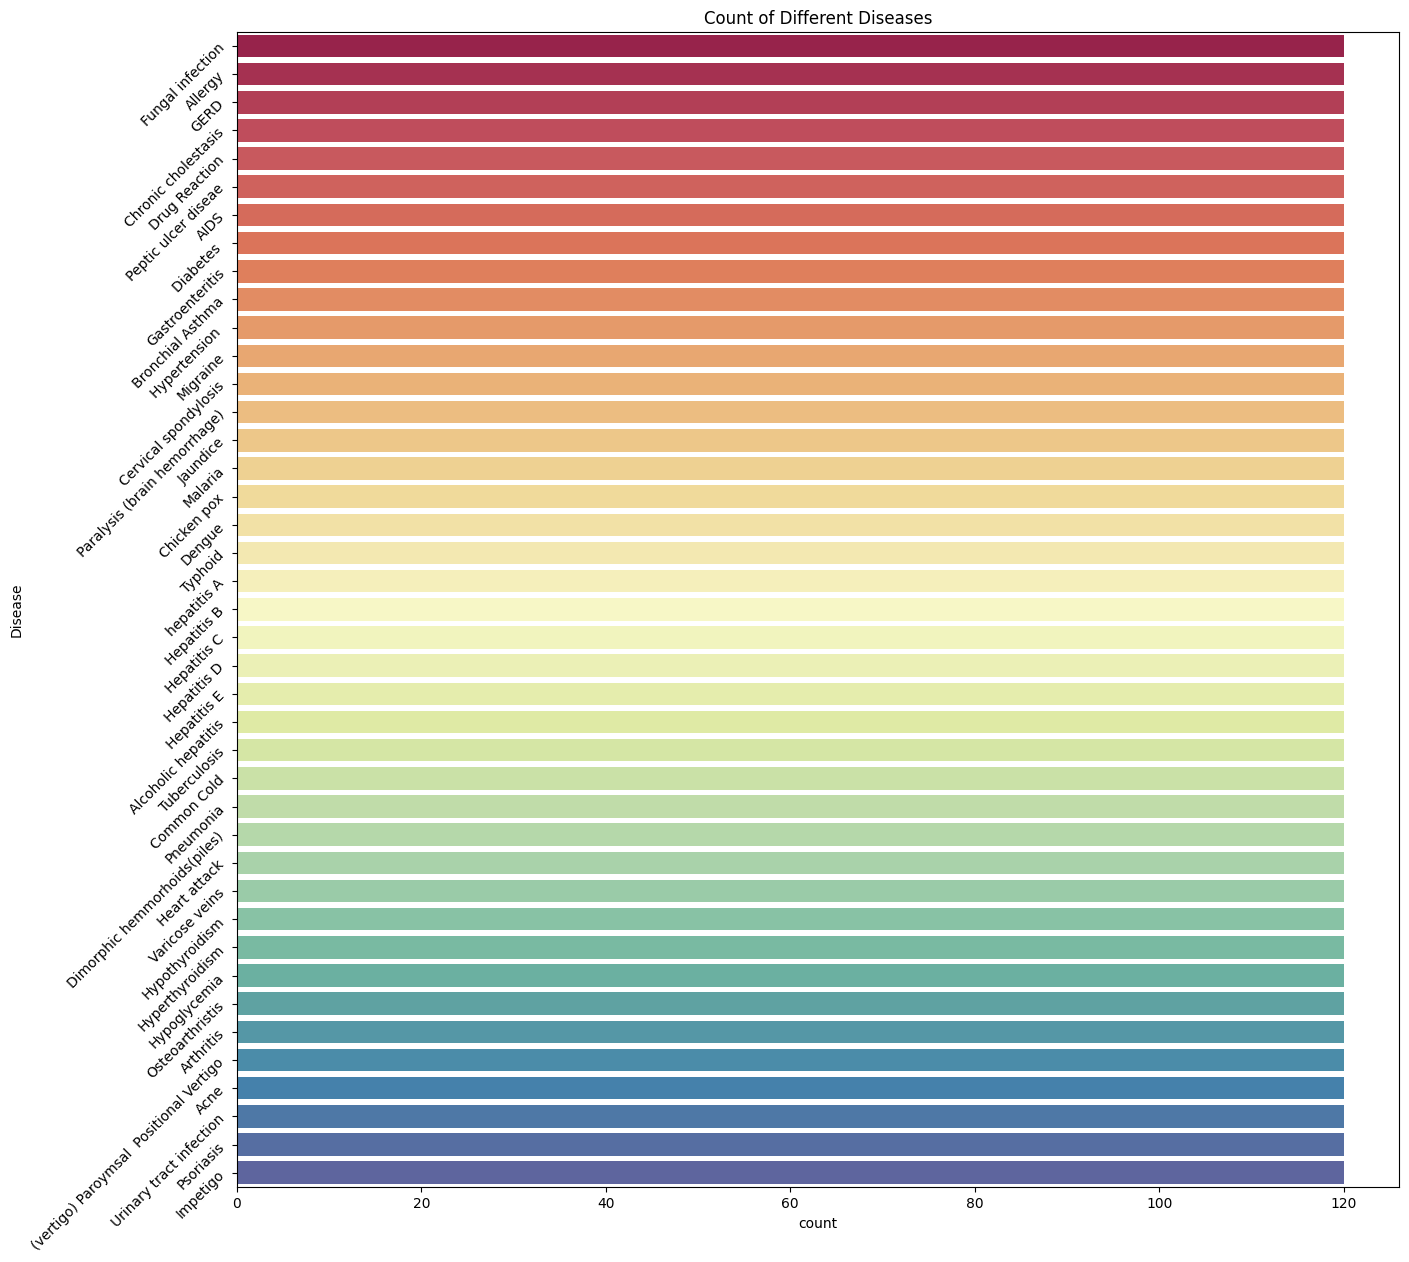

In [67]:
plt.figure(figsize=(15, 15))
sns.countplot(y="Disease", data=df, hue="Disease", palette="Spectral", legend= False)
plt.yticks(rotation=45)
plt.title("Count of Different Diseases")
plt.show()

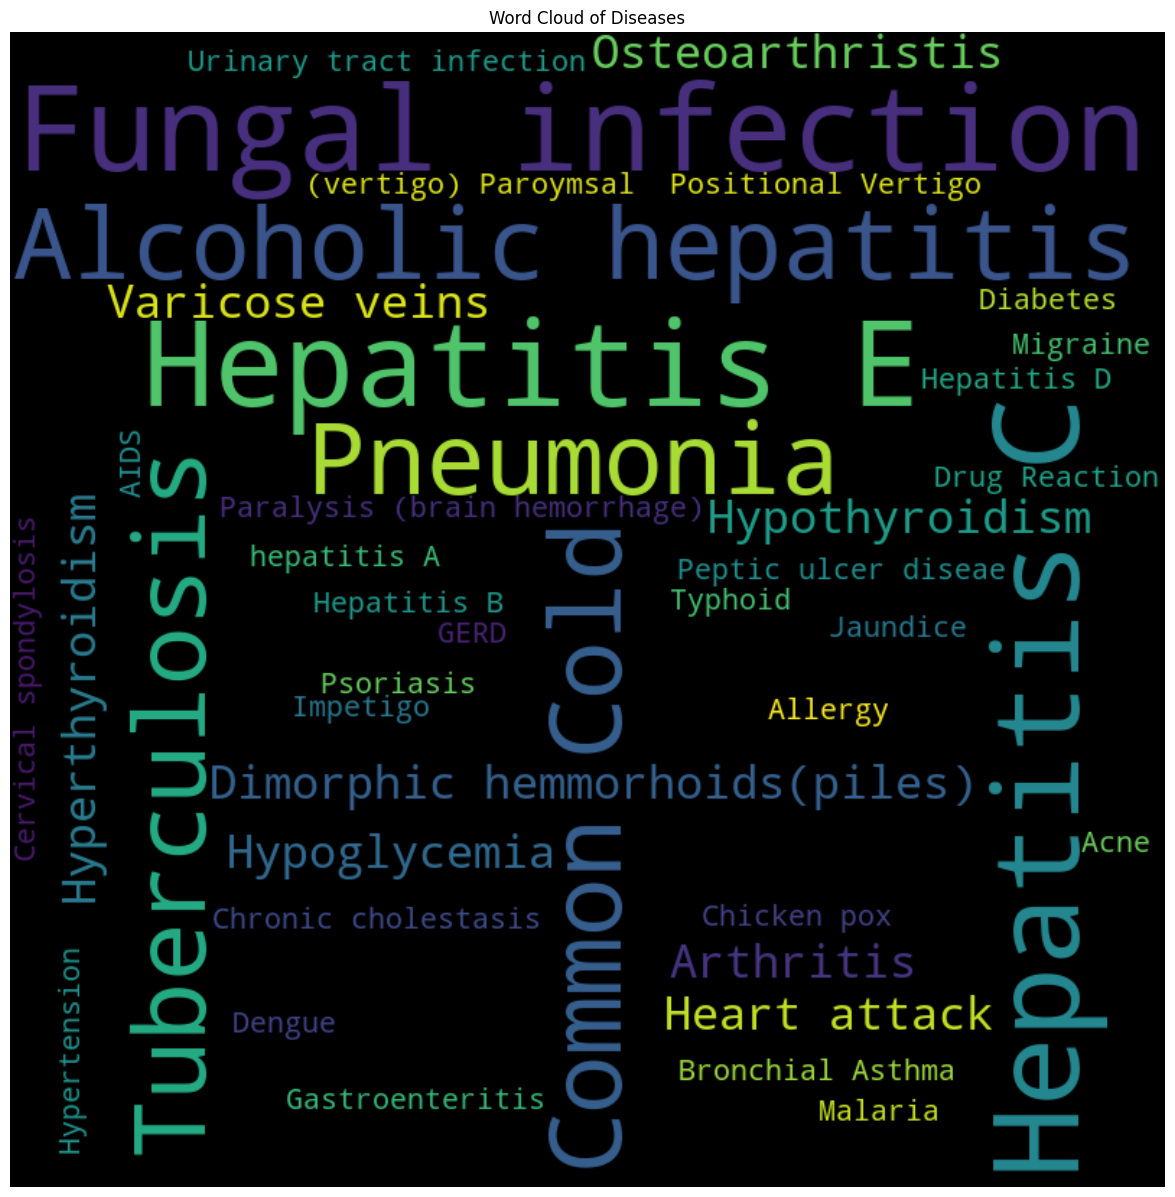

In [68]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color='black', width=800, height=800).generate_from_frequencies(df['Disease'].value_counts())

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Diseases')
plt.show()


In [69]:
df["Symptom_1"].value_counts()

Symptom_1
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                       12
 pain_during_bowel_movements      6
 cramps           

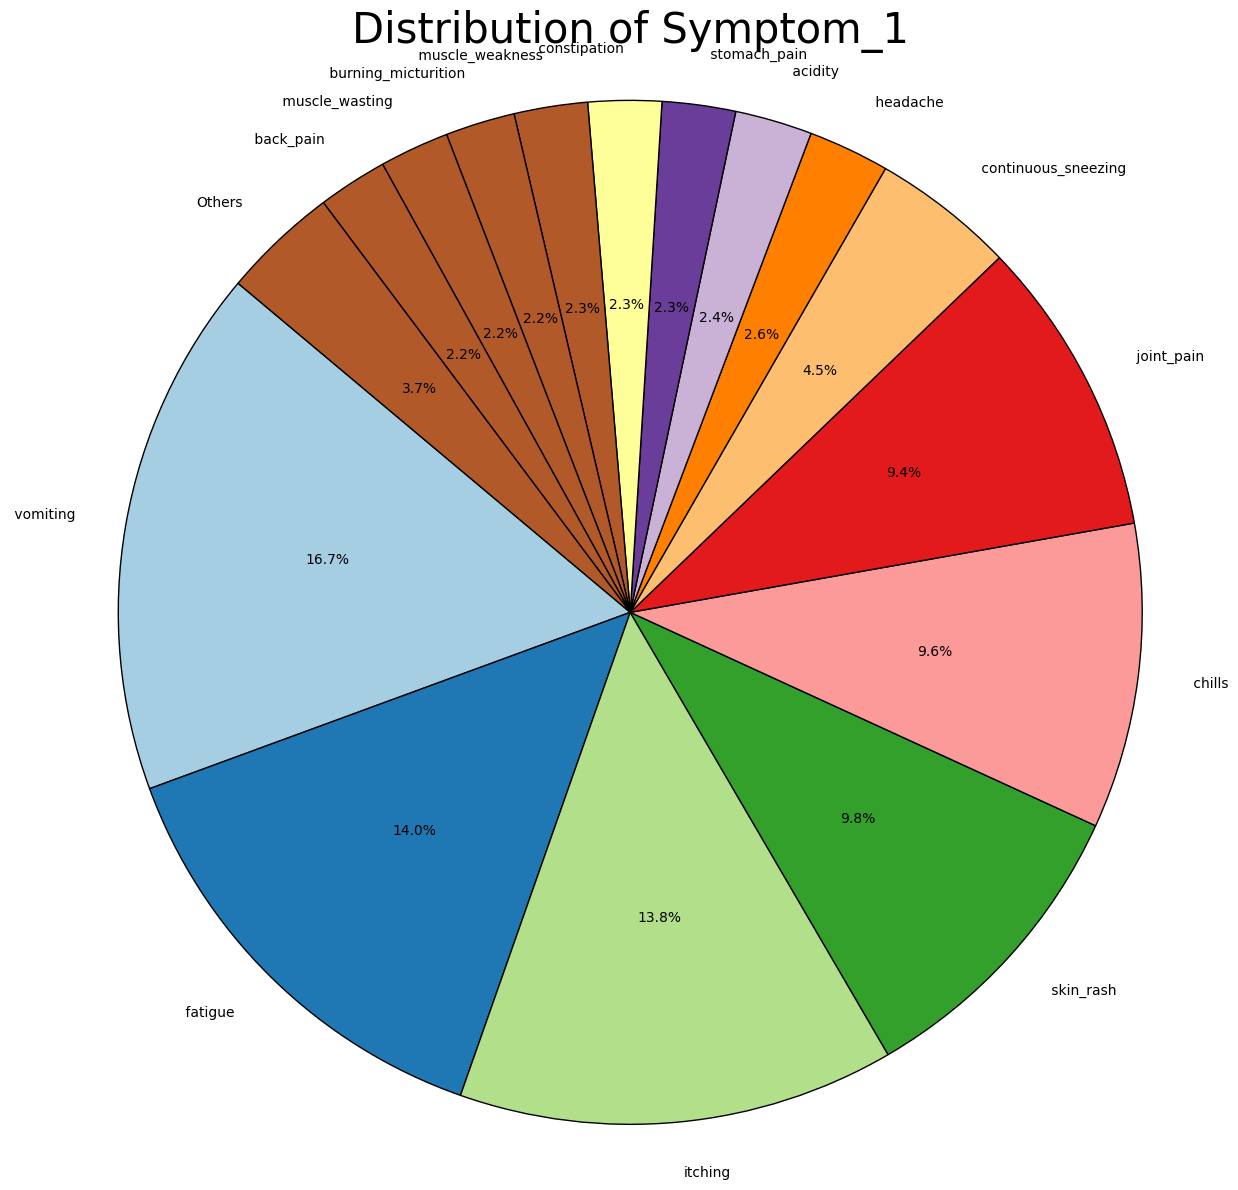

In [70]:

# Count occurrences of unique symptoms in Symptom_1
symptom_counts = df["Symptom_1"].value_counts()

# Aggregate smaller categories into "Others" for better readability
threshold = 20  # Minimum count to display individually
symptom_counts_filtered = symptom_counts[symptom_counts > threshold]
symptom_counts_filtered["Others"] = symptom_counts[symptom_counts <= threshold].sum()

# Generate color palette
colors = plt.cm.Paired(range(len(symptom_counts_filtered)))

# Plot the pie chart
plt.figure(figsize=(12, 12))  # Adjusted for better visualization
plt.pie(
    symptom_counts_filtered,
    labels=symptom_counts_filtered.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},  # Add black borders for better distinction
)
plt.title("Distribution of Symptom_1", fontsize=30, color="black")
plt.axis("equal")  # Ensures the chart is circular
plt.tight_layout()  # Adjust layout for better fit
plt.show()


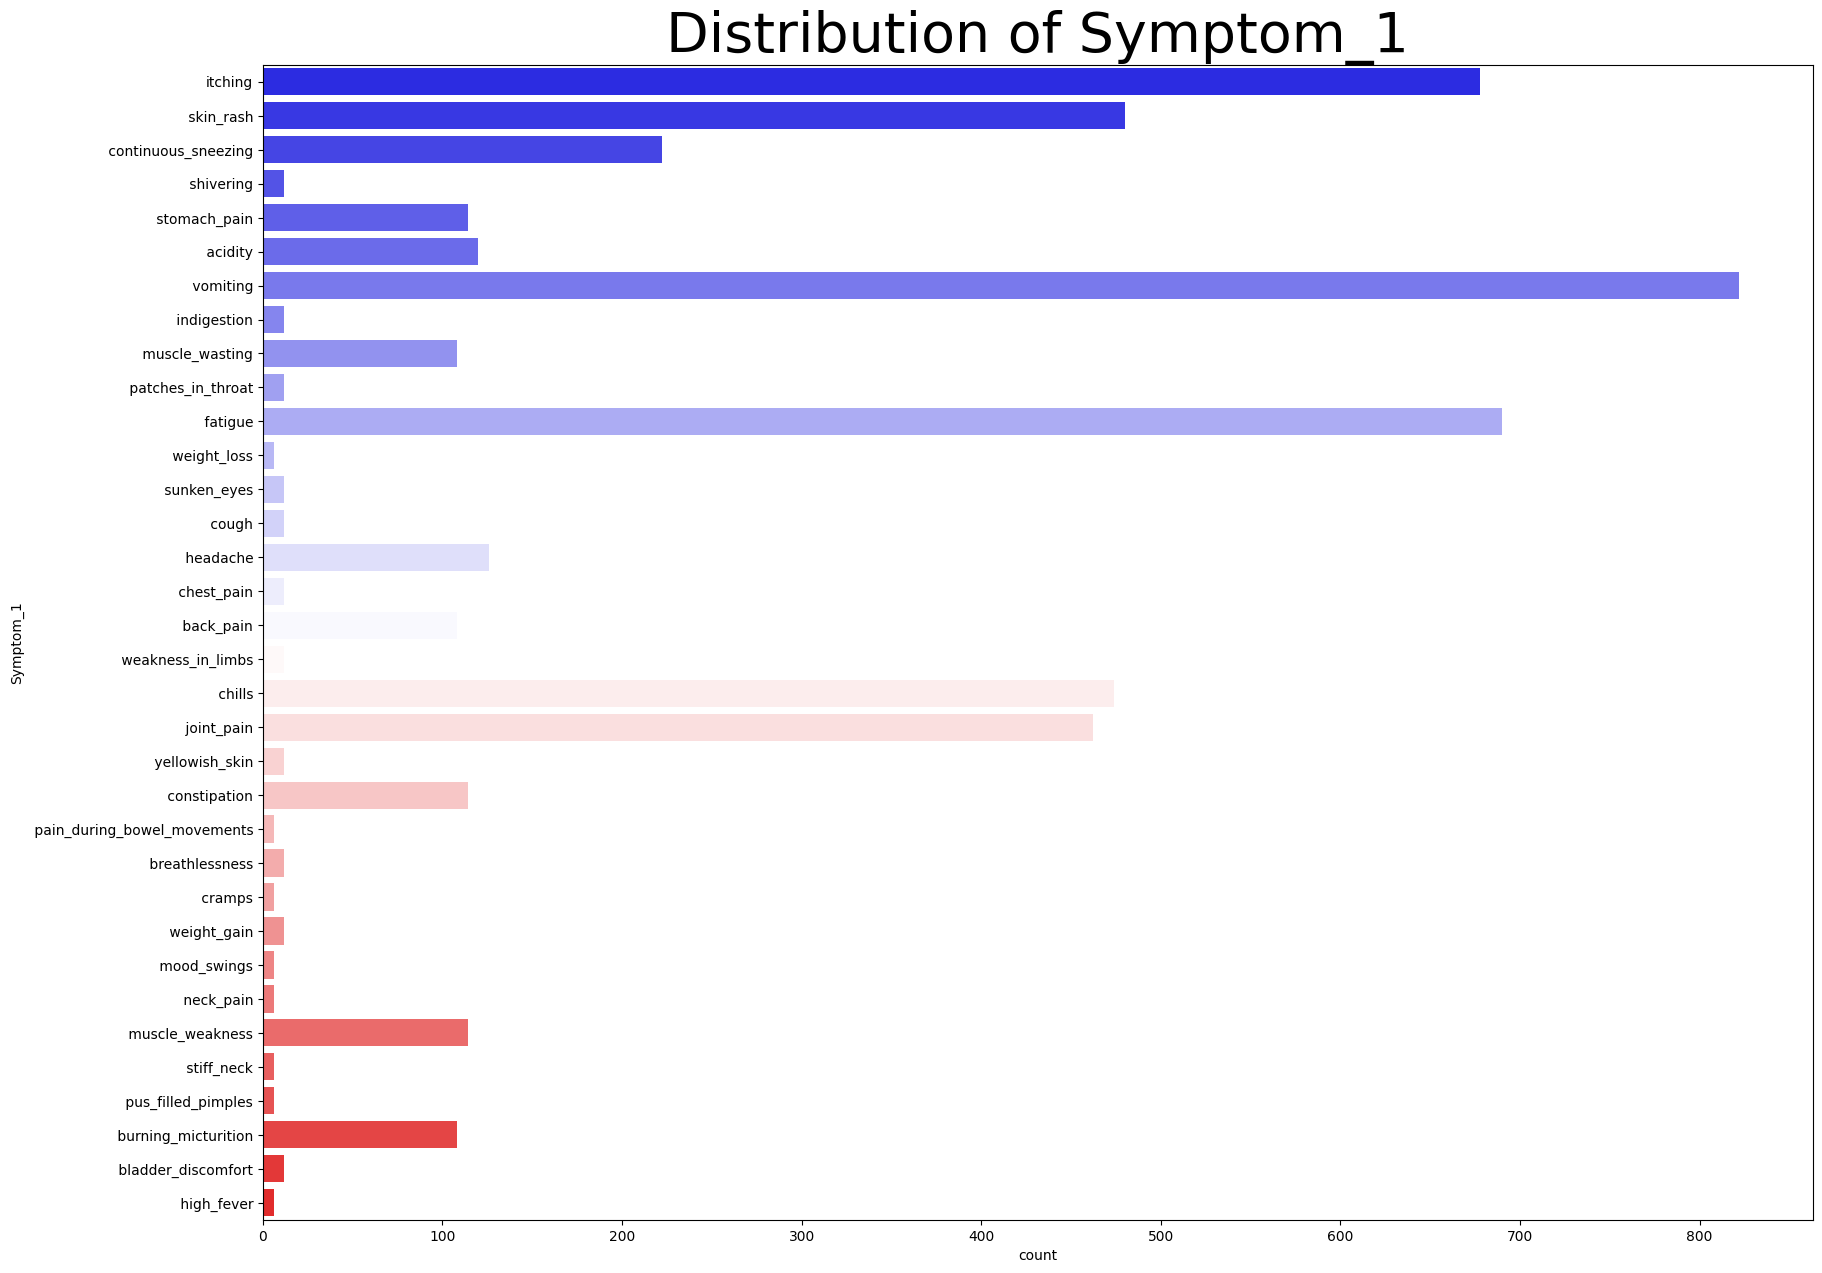

In [72]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_1', data=df, palette="bwr")
plt.title("Distribution of Symptom_1",fontsize=40)
plt.show()


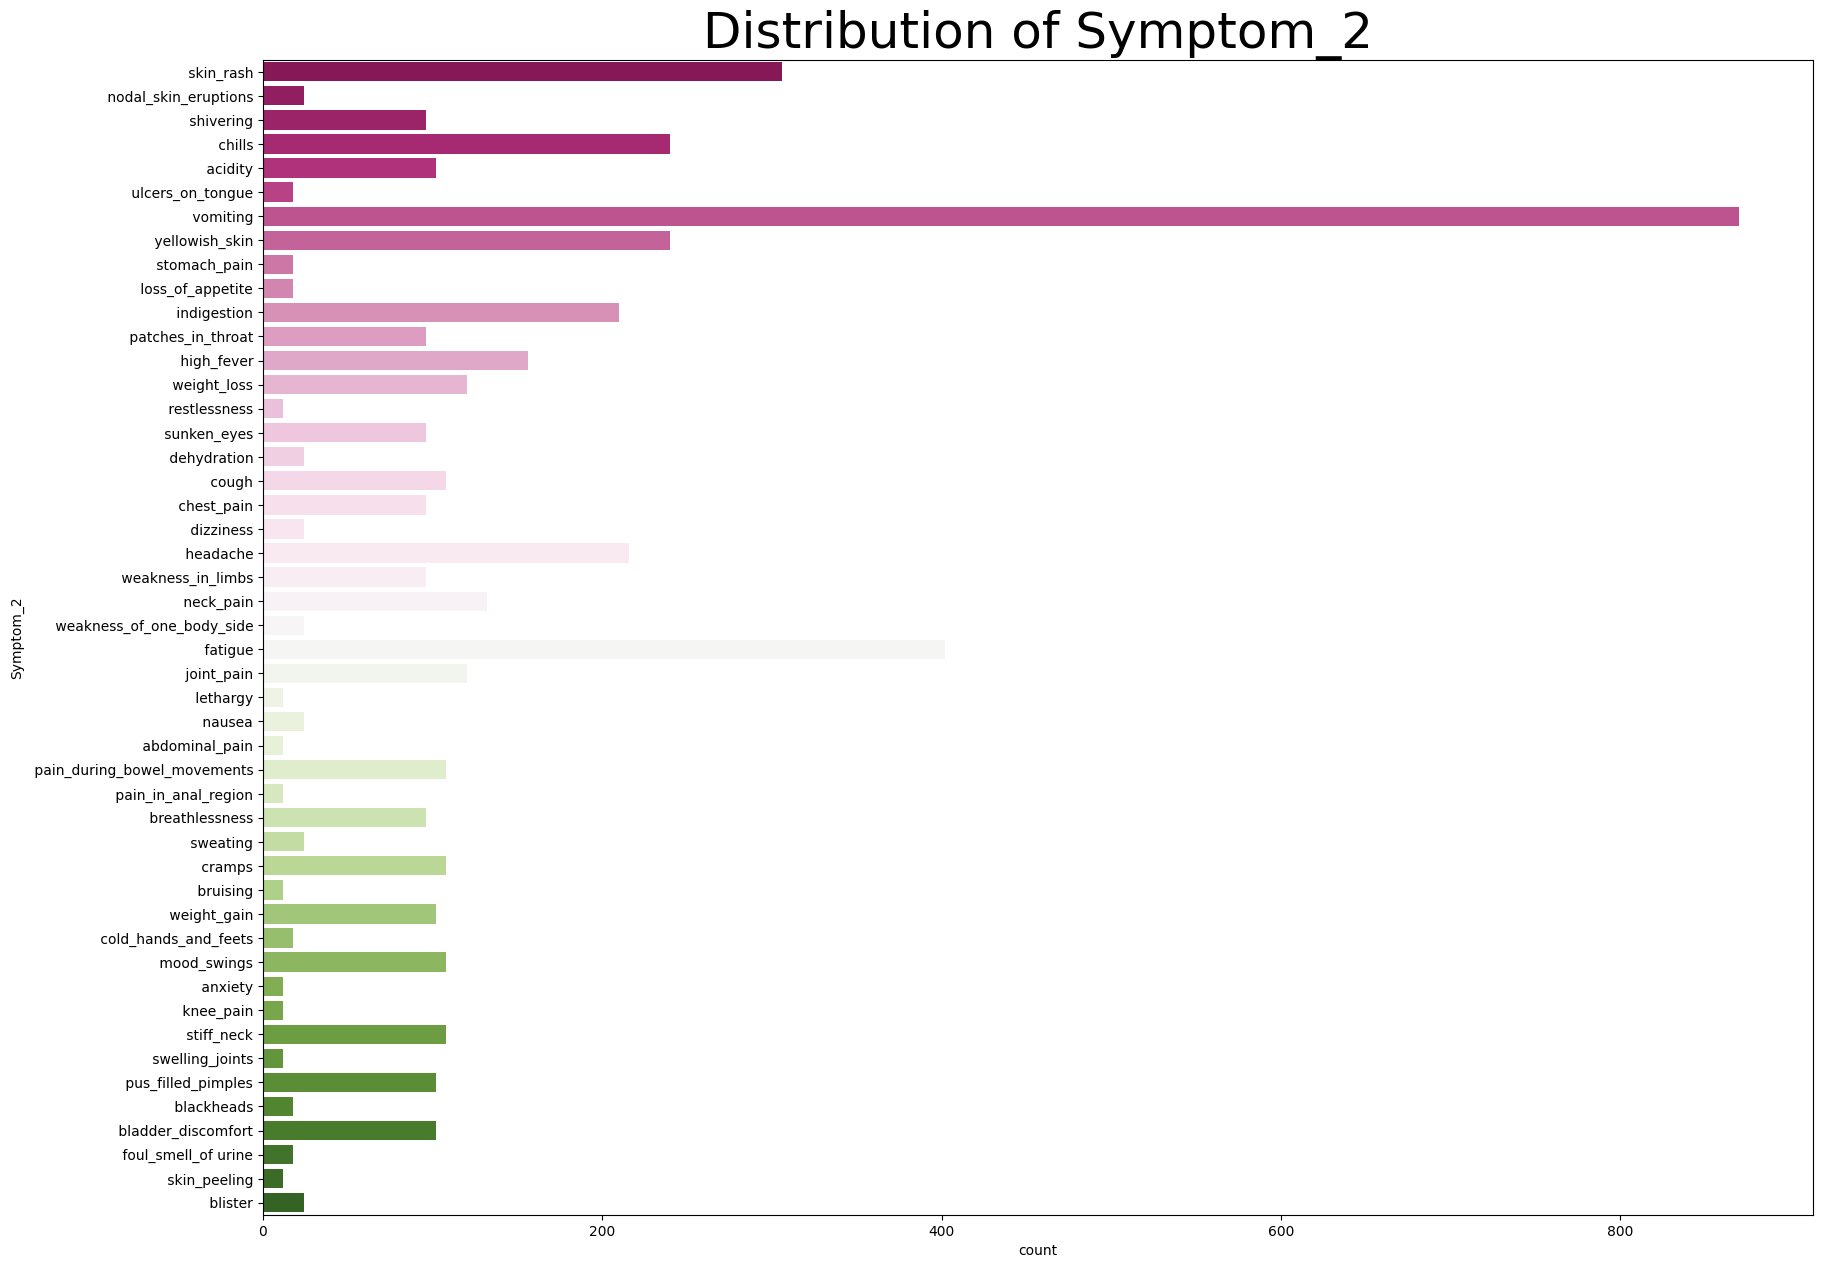

In [73]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_2', data=df, palette="PiYG")
plt.title("Distribution of Symptom_2",fontsize=36)
plt.show()

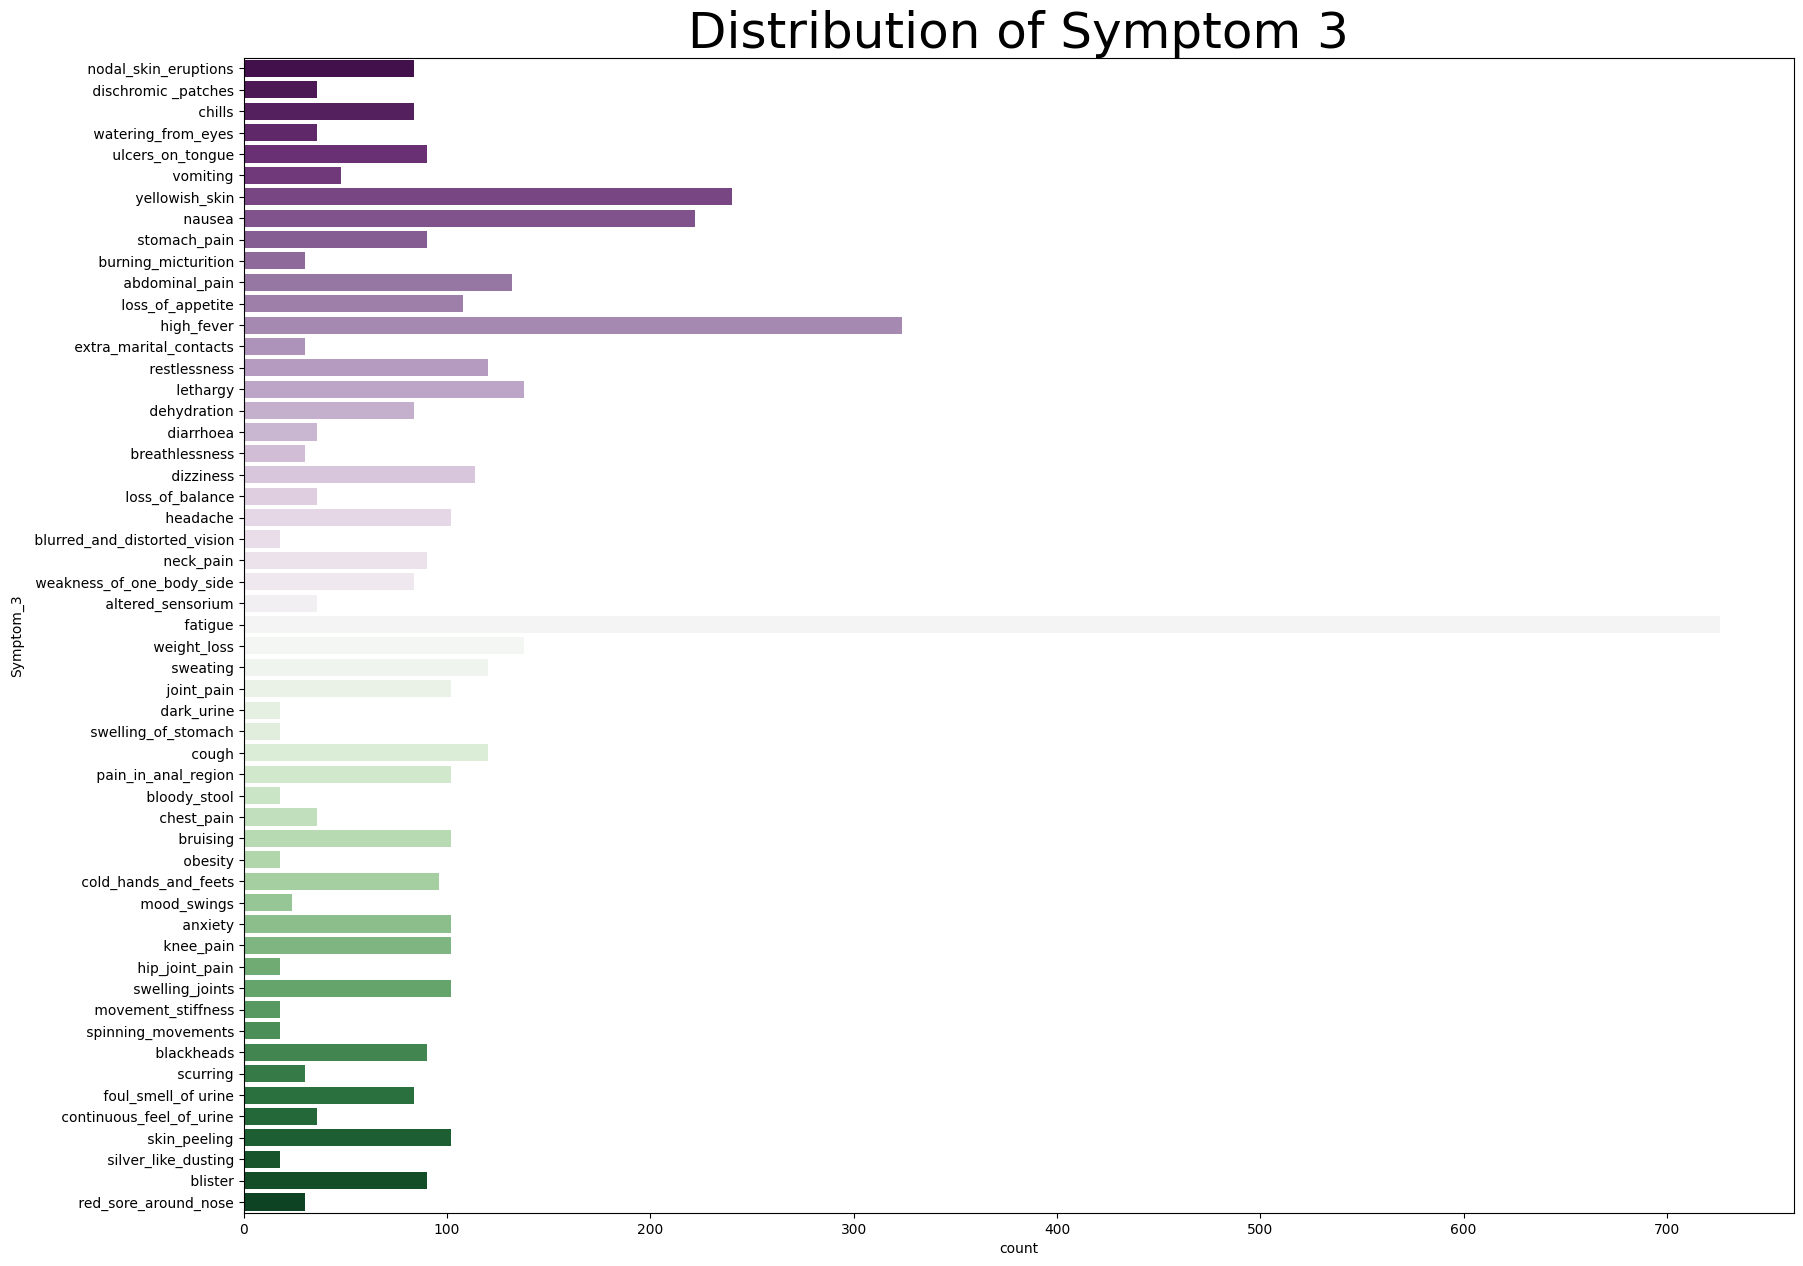

In [74]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_3', data=df, palette="PRGn")
plt.title("Distribution of Symptom 3",fontsize=36)
plt.show()

In [75]:
df["Symptom_4"].value_counts()

Symptom_4
 high_fever                      378
0                                348
 lethargy                        222
 yellowish_skin                  216
 sweating                        216
 weight_loss                     192
 vomiting                        174
 cough                           162
 loss_of_balance                 144
 dark_urine                      144
 nausea                          120
 loss_of_appetite                120
 breathlessness                  108
 hip_joint_pain                   96
 blurred_and_distorted_vision     96
 movement_stiffness               96
 restlessness                     96
 bloody_stool                     96
 swelling_of_stomach              96
 silver_like_dusting              96
 obesity                          96
 mood_swings                      90
 spinning_movements               90
 dizziness                        84
 abdominal_pain                   84
 red_sore_around_nose             84
 altered_sensorium          

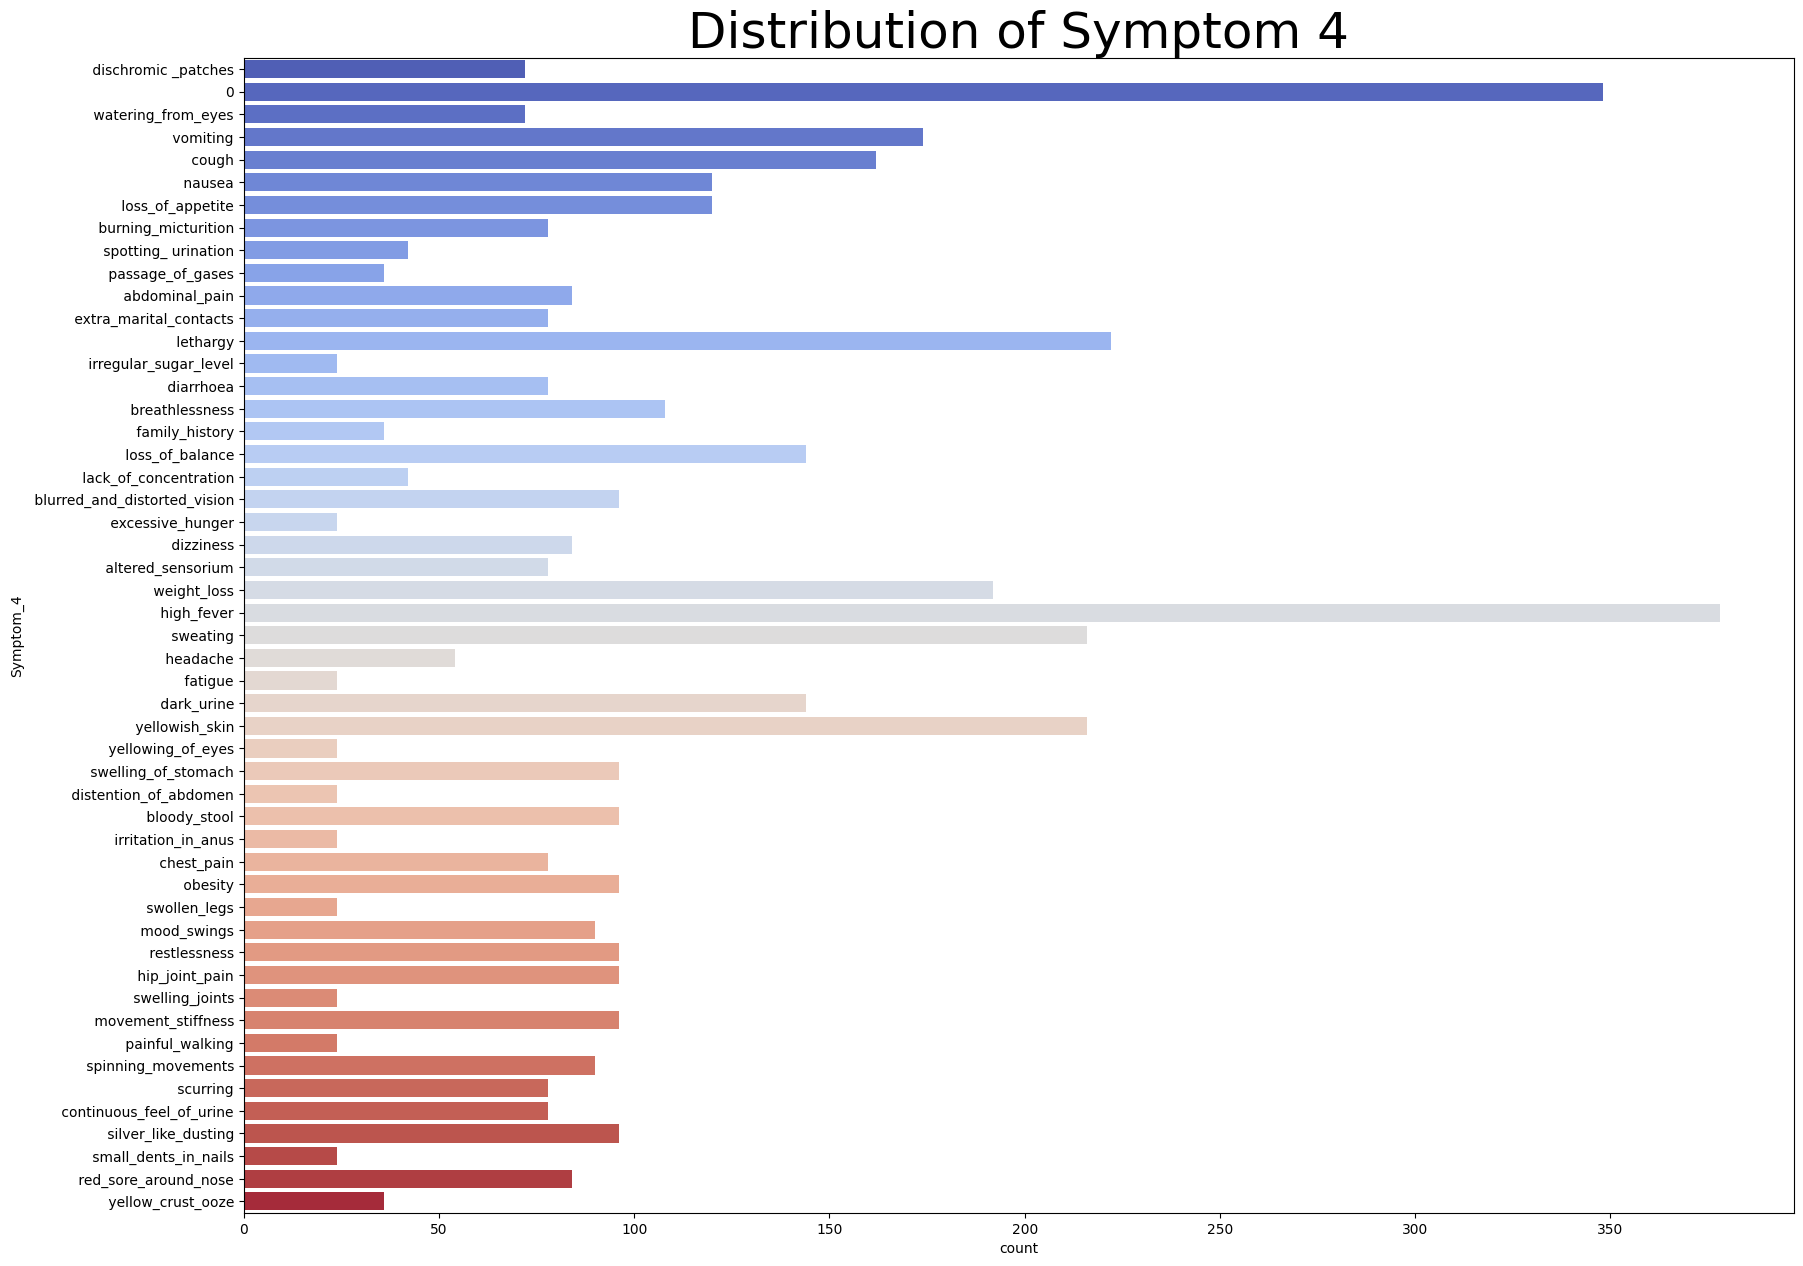

In [76]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Symptom_4', data=df, palette="coolwarm")
plt.title("Distribution of Symptom 4",fontsize=36)
plt.show()

In [77]:
df["Symptom_5"].value_counts()

Symptom_5
0                                  1206
 headache                           348
 high_fever                         330
 dark_urine                         210
 nausea                             192
 loss_of_balance                    162
 cough                              162
 loss_of_appetite                   150
 sweating                           120
 painful_walking                    120
 yellowish_skin                     120
 family_history                     114
 swollen_legs                        90
 fatigue                             90
 irritation_in_anus                  90
 breathlessness                      90
 distention_of_abdomen               90
 excessive_hunger                    90
 swelling_joints                     90
 irregular_sugar_level               90
 small_dents_in_nails                90
 lethargy                            84
 yellowing_of_eyes                   84
 yellow_crust_ooze                   78
 passage_of_gases             

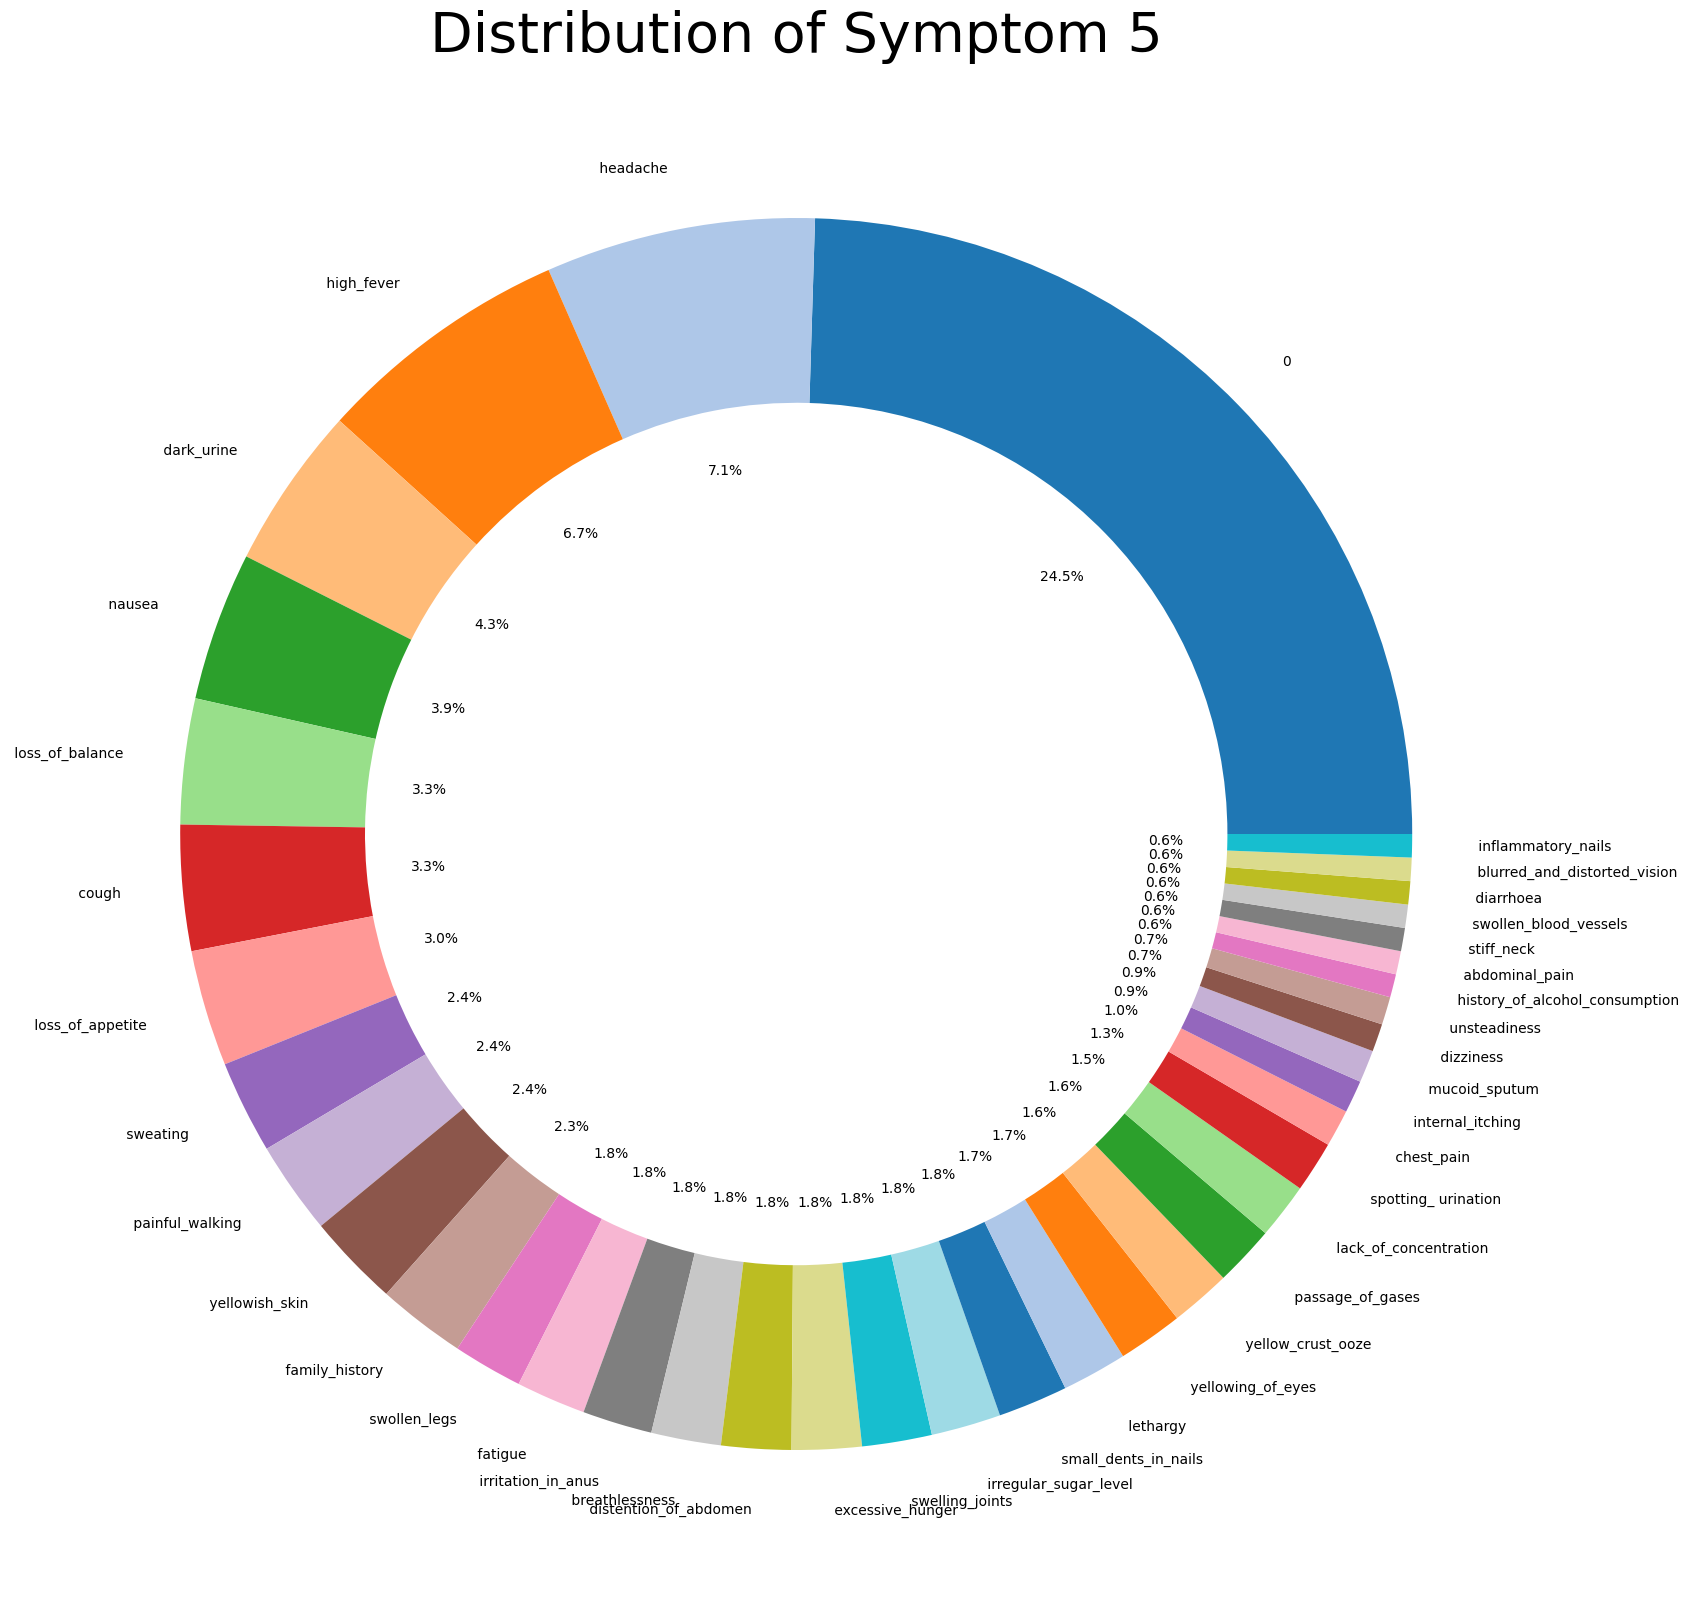

In [78]:


symptom_5_counts = df["Symptom_5"].value_counts()

plt.figure(figsize=(20, 20))
plt.pie(symptom_5_counts, labels=symptom_5_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_5_counts)], wedgeprops=dict(width=0.3))
plt.title("Distribution of Symptom 5", fontsize=40)
plt.show()


In [79]:
df["Symptom_6"].value_counts()

Symptom_6
0                                  1986
 nausea                             390
 loss_of_appetite                   240
 headache                           204
 high_fever                         168
 abdominal_pain                     156
 blurred_and_distorted_vision       120
 dark_urine                         120
 diarrhoea                          120
 painful_walking                     84
 sweating                            84
 history_of_alcohol_consumption      84
 inflammatory_nails                  84
 yellowish_skin                      84
 stiff_neck                          84
 unsteadiness                        78
 dizziness                           78
 swollen_blood_vessels               78
 family_history                      78
 mucoid_sputum                       72
 internal_itching                    72
 chest_pain                          66
 prominent_veins_on_calf             42
 puffy_face_and_eyes                 42
 breathlessness               

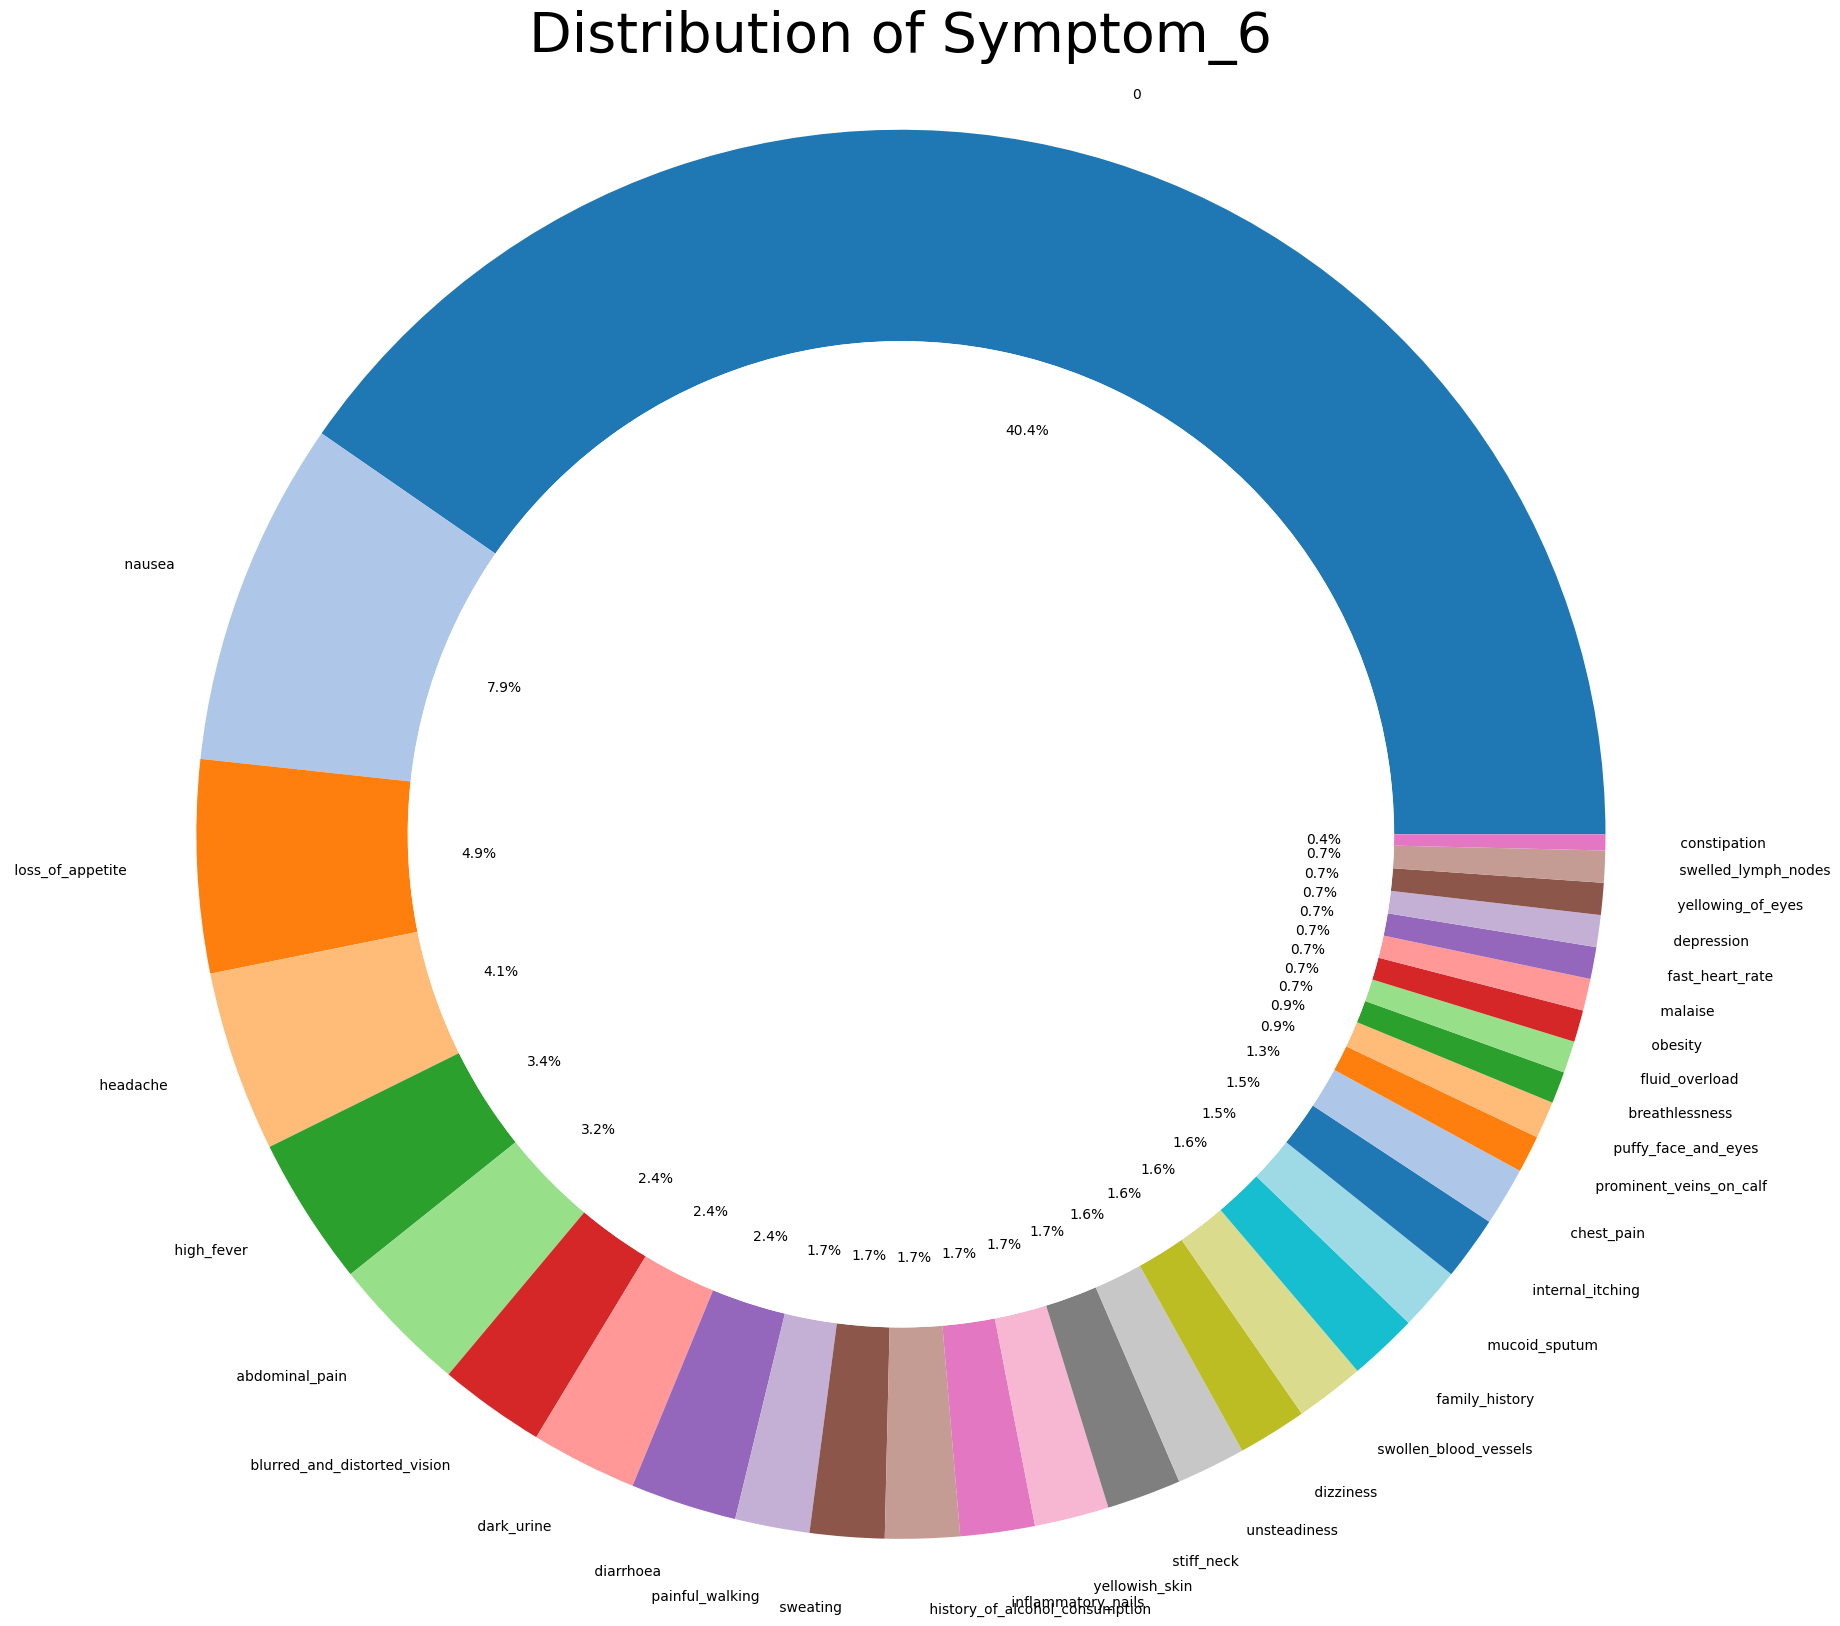

In [80]:
plt.figure(figsize=(20, 20))
symptom_6_counts = df["Symptom_6"].value_counts()
plt.pie(symptom_6_counts, labels=symptom_6_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.tab20.colors[:len(symptom_6_counts)], wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.title("Distribution of Symptom_6",fontsize=40)
plt.show()

In [81]:
df["Symptom_7"].value_counts()

Symptom_7
0                                2652
 abdominal_pain                   264
 loss_of_appetite                 198
 excessive_hunger                 126
 malaise                          120
 diarrhoea                        114
 nausea                           114
 constipation                      96
 headache                          84
 dark_urine                        78
 fast_heart_rate                   78
 obesity                           78
 swelled_lymph_nodes               78
 fluid_overload                    78
 breathlessness                    78
 yellowing_of_eyes                 78
 depression                        78
 blurred_and_distorted_vision      78
 prominent_veins_on_calf           72
 puffy_face_and_eyes               72
 muscle_pain                       48
 enlarged_thyroid                  48
 yellow_urine                      42
 sweating                          42
 mild_fever                        42
 phlegm                            42
 i

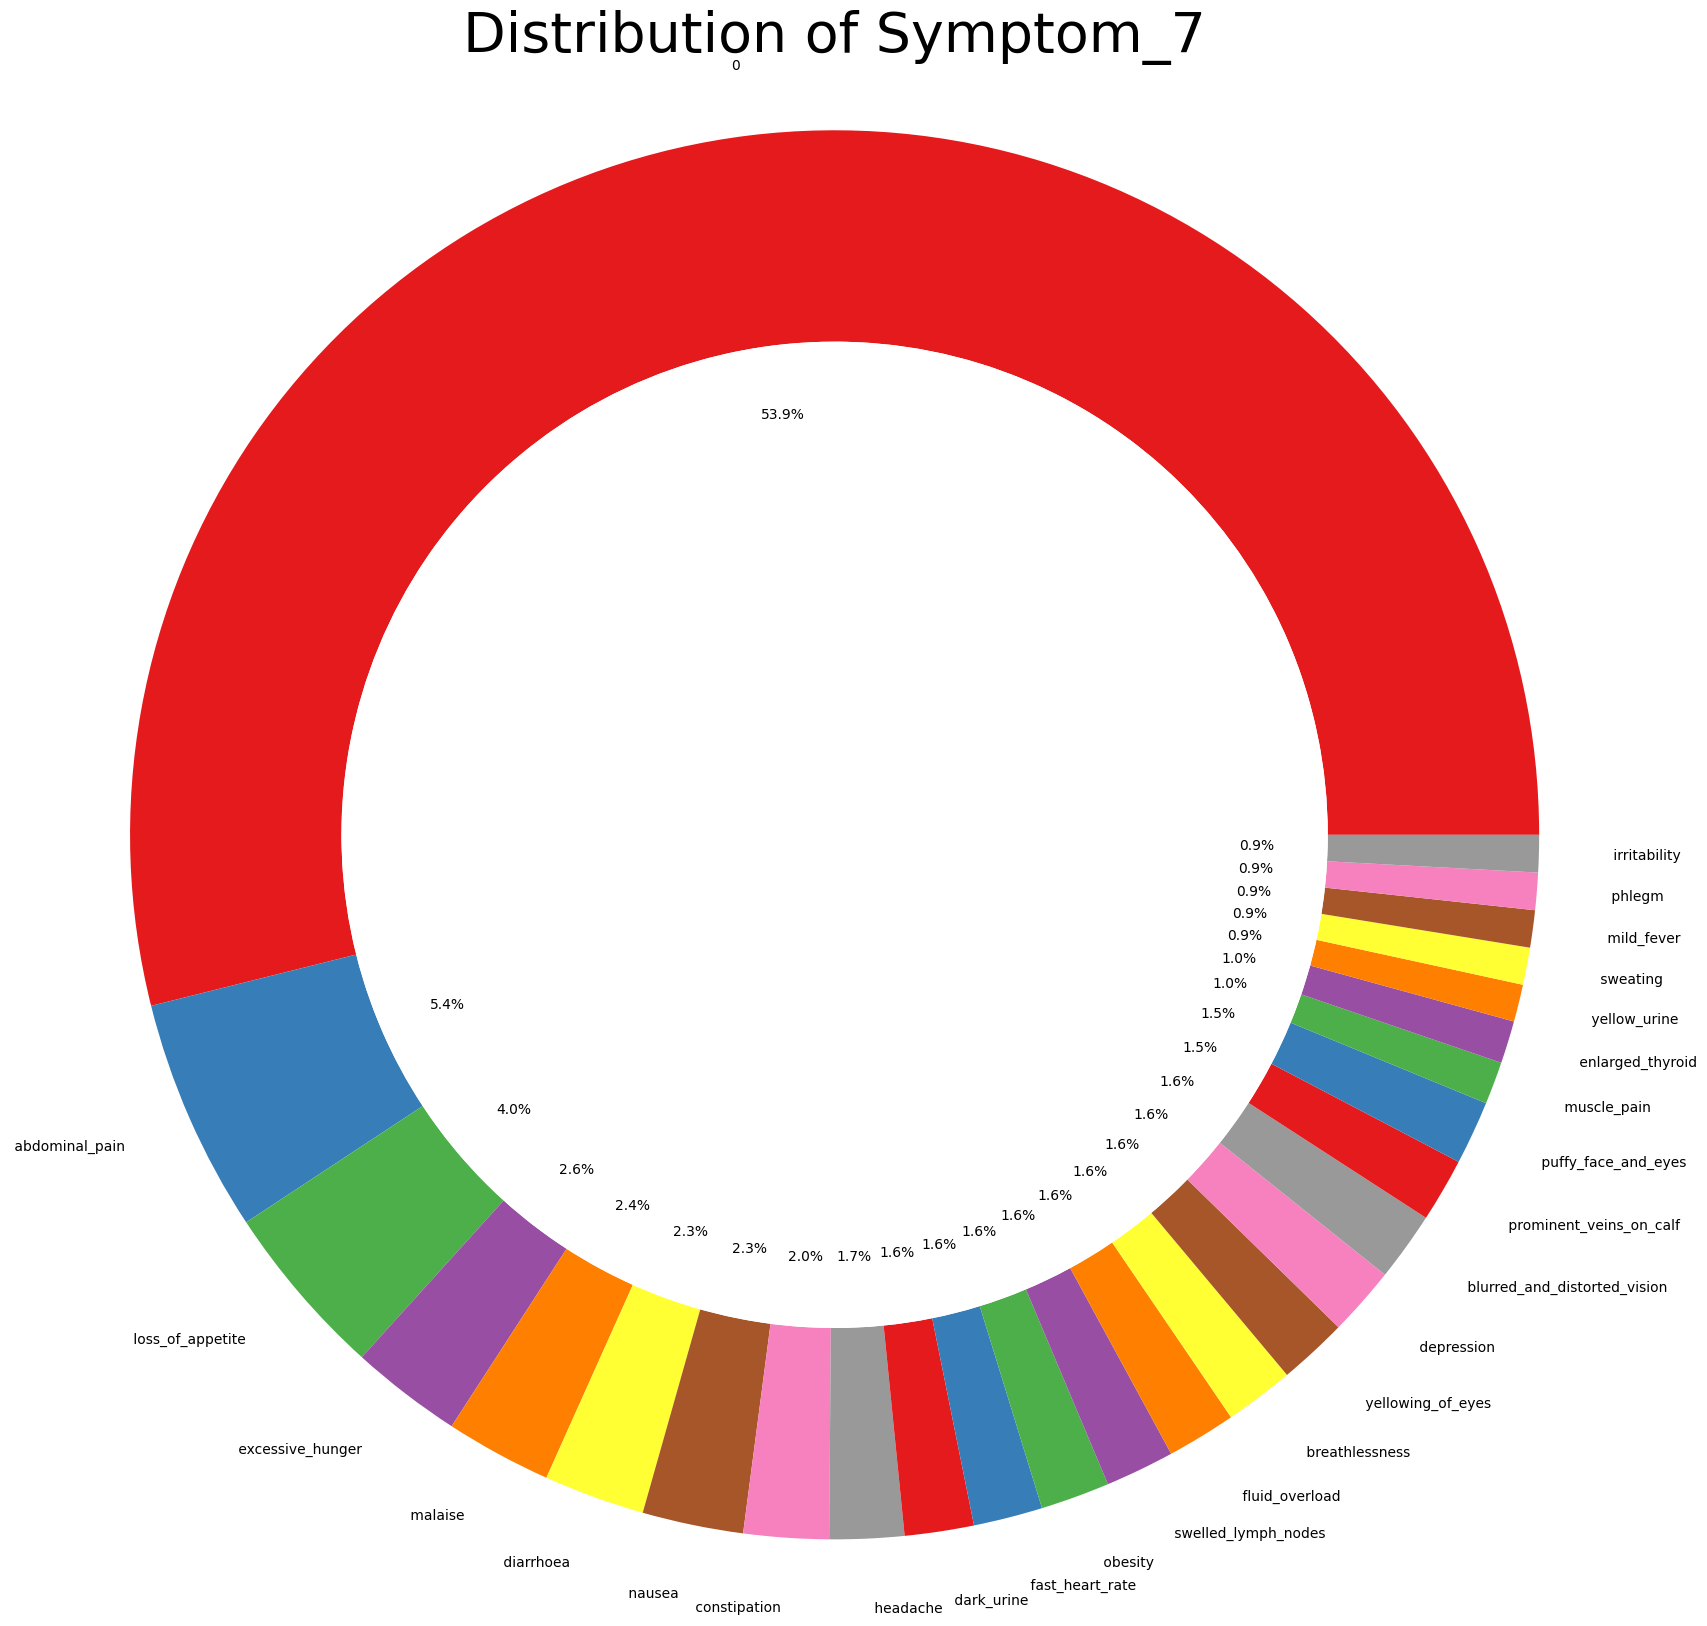

In [82]:
symptom_7_counts = df["Symptom_7"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))

outer_colors = plt.cm.Set1.colors[:len(symptom_7_counts)]
wedges, texts, autotexts = ax.pie(symptom_7_counts, labels=symptom_7_counts.index, autopct='%1.1f%%', 
                                  colors=outer_colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Distribution of Symptom_7",fontsize=40)
plt.show()

In [83]:
df["Symptom_8"].value_counts()

Symptom_8
0                            2976
 abdominal_pain               276
 excessive_hunger             222
 loss_of_appetite             162
 mild_fever                   120
 phlegm                       120
 diarrhoea                    102
 yellowing_of_eyes             96
 nausea                        84
 muscle_pain                   72
 irritability                  72
 yellow_urine                  72
 sweating                      72
 malaise                       72
 enlarged_thyroid              72
 swelled_lymph_nodes           48
 visual_disturbances           48
 increased_appetite            48
 chest_pain                    48
 brittle_nails                 48
 muscle_weakness               48
 drying_and_tingling_lips      42
Name: count, dtype: int64

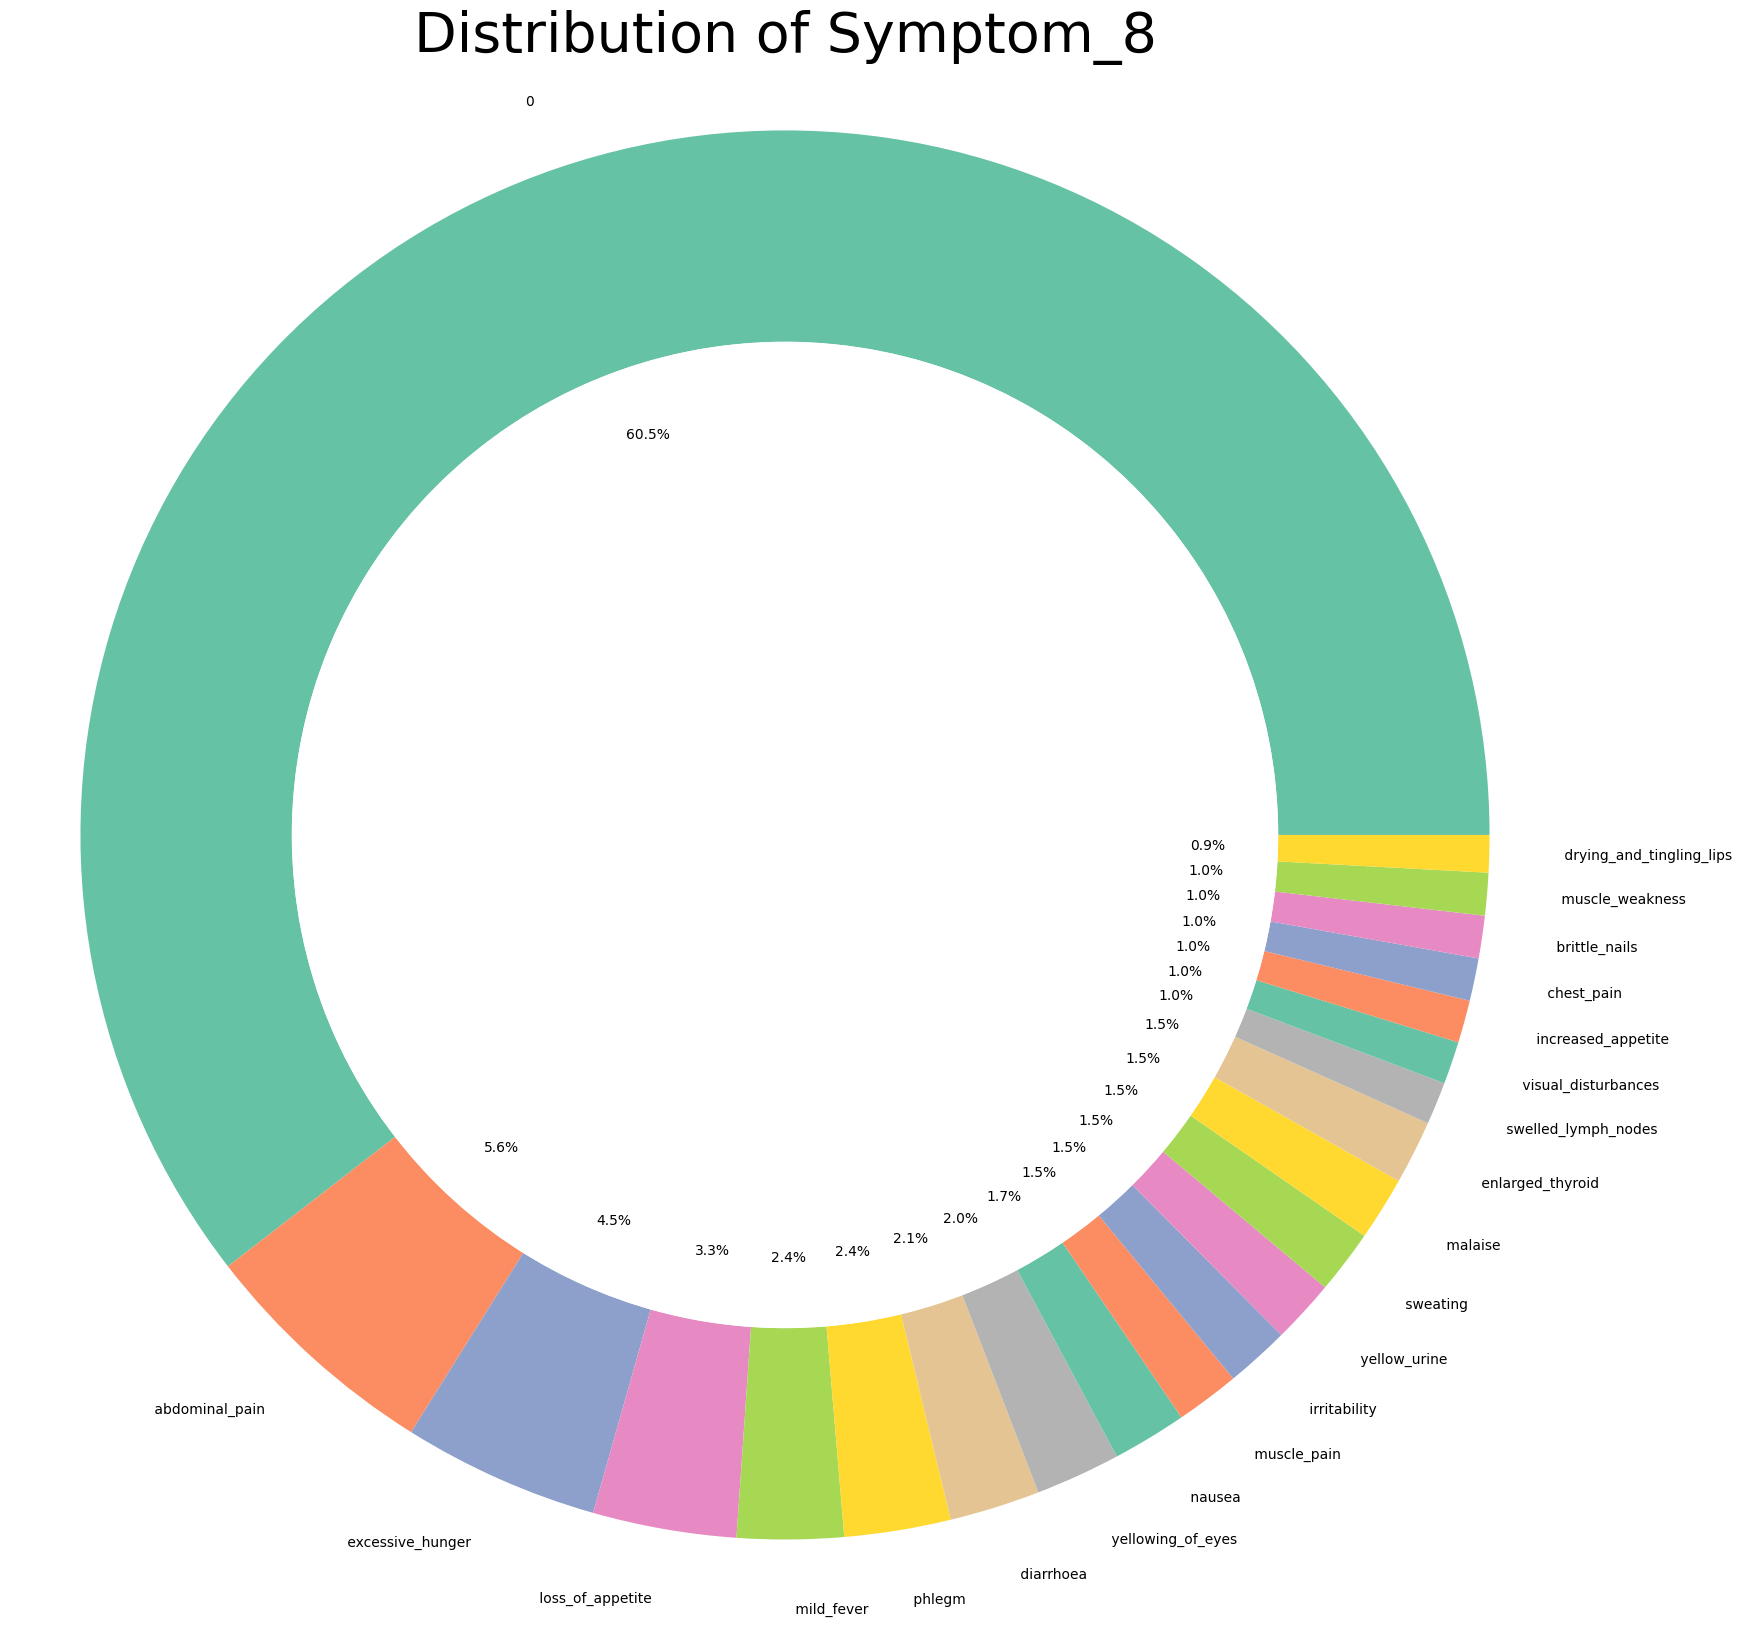

In [84]:
symptom_8_counts = df["Symptom_8"].value_counts()

plt.figure(figsize=(20,20))
colors = plt.cm.Set2.colors[:len(symptom_8_counts)]
plt.pie(symptom_8_counts, labels=symptom_8_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("Distribution of Symptom_8",fontsize=40)
plt.show()

In [85]:
df["Symptom_9"].value_counts()

Symptom_9
0                            3228
 yellowing_of_eyes            228
 loss_of_appetite             156
 mild_fever                   120
 malaise                      102
 diarrhoea                     84
 abdominal_pain                78
 phlegm                        72
 muscle_weakness               72
 brittle_nails                 72
 chest_pain                    72
 drying_and_tingling_lips      72
 increased_appetite            72
 visual_disturbances           66
 swelled_lymph_nodes           66
 throat_irritation             48
 fast_heart_rate               48
 swollen_extremeties           48
 irritability                  48
 slurred_speech                48
 polyuria                      48
 toxic_look_(typhos)           36
 pain_behind_the_eyes          36
Name: count, dtype: int64

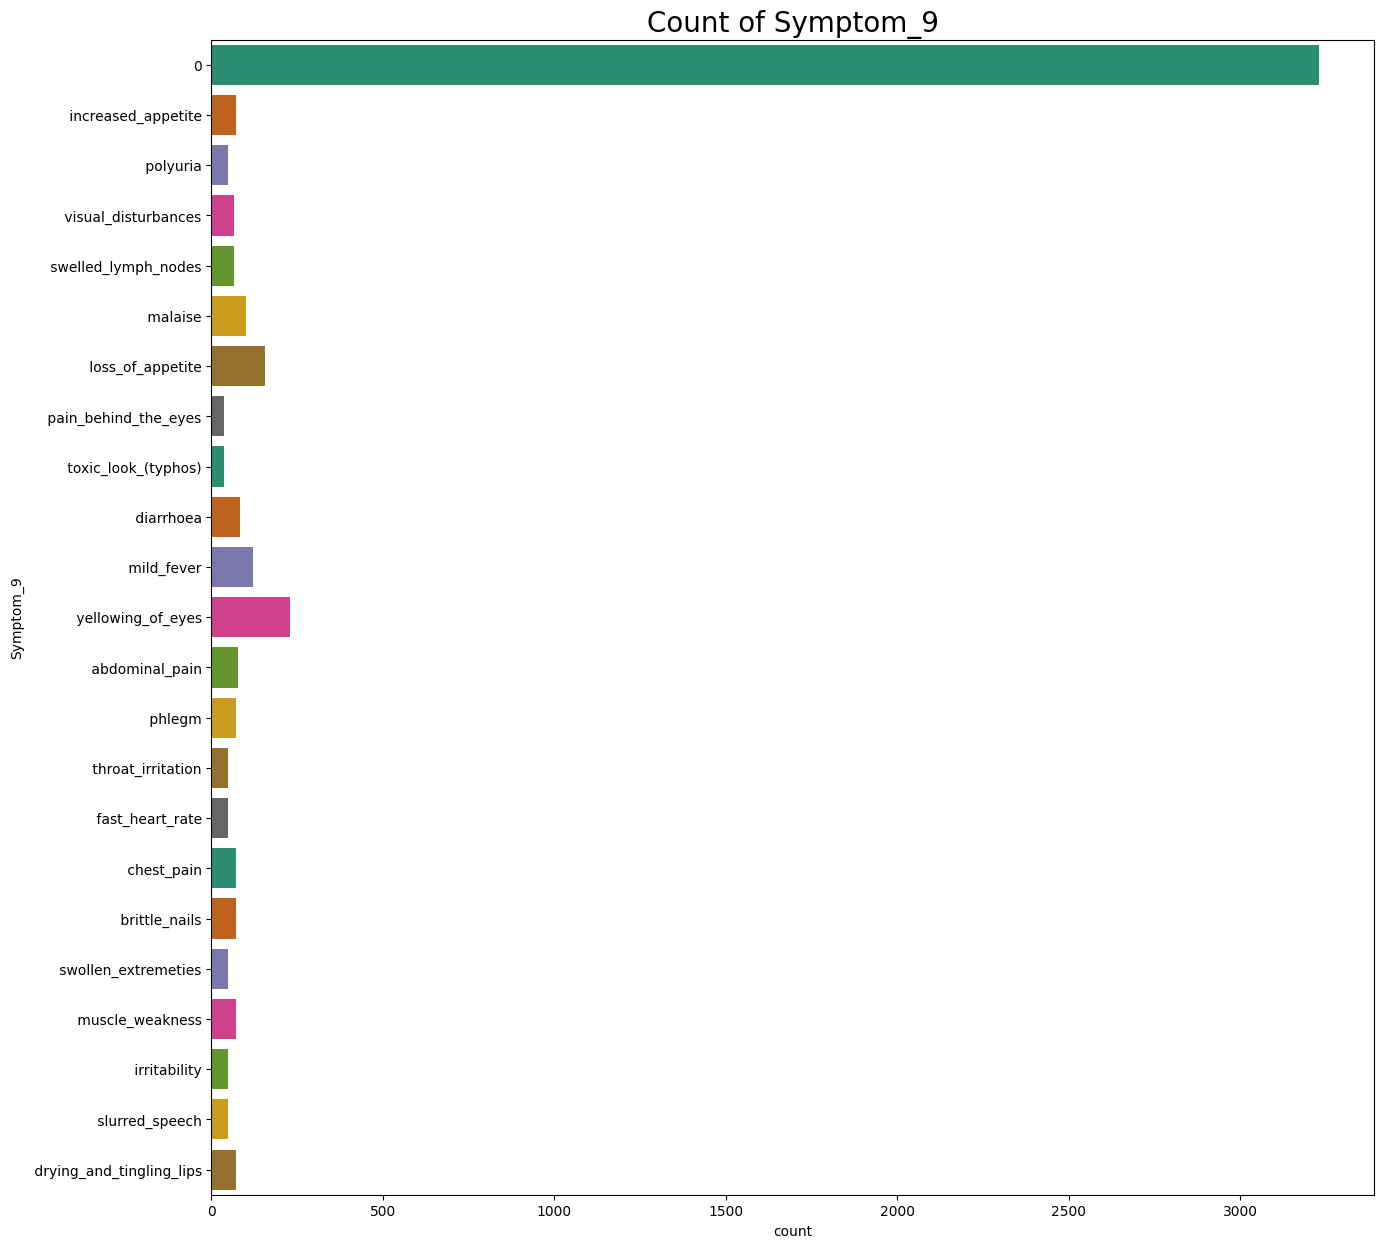

In [86]:
plt.figure(figsize=(15,15))

sns.countplot(y="Symptom_9", data=df, palette="Dark2")
plt.title("Count of Symptom_9", fontsize=20)
plt.show()


In [87]:
df["Symptom_10"].value_counts()

Symptom_10
0                               3408
 yellowing_of_eyes               198
 malaise                         138
 irritability                    120
 pain_behind_the_eyes             84
 toxic_look_(typhos)              78
 polyuria                         72
 swollen_extremeties              72
 fast_heart_rate                  72
 throat_irritation                72
 mild_fever                       72
 slurred_speech                   72
 red_spots_over_body              54
 receiving_blood_transfusion      48
 muscle_pain                      48
 redness_of_eyes                  48
 rusty_sputum                     48
 depression                       48
 abnormal_menstruation            48
 belly_pain                       42
 acute_liver_failure              42
 back_pain                        36
Name: count, dtype: int64

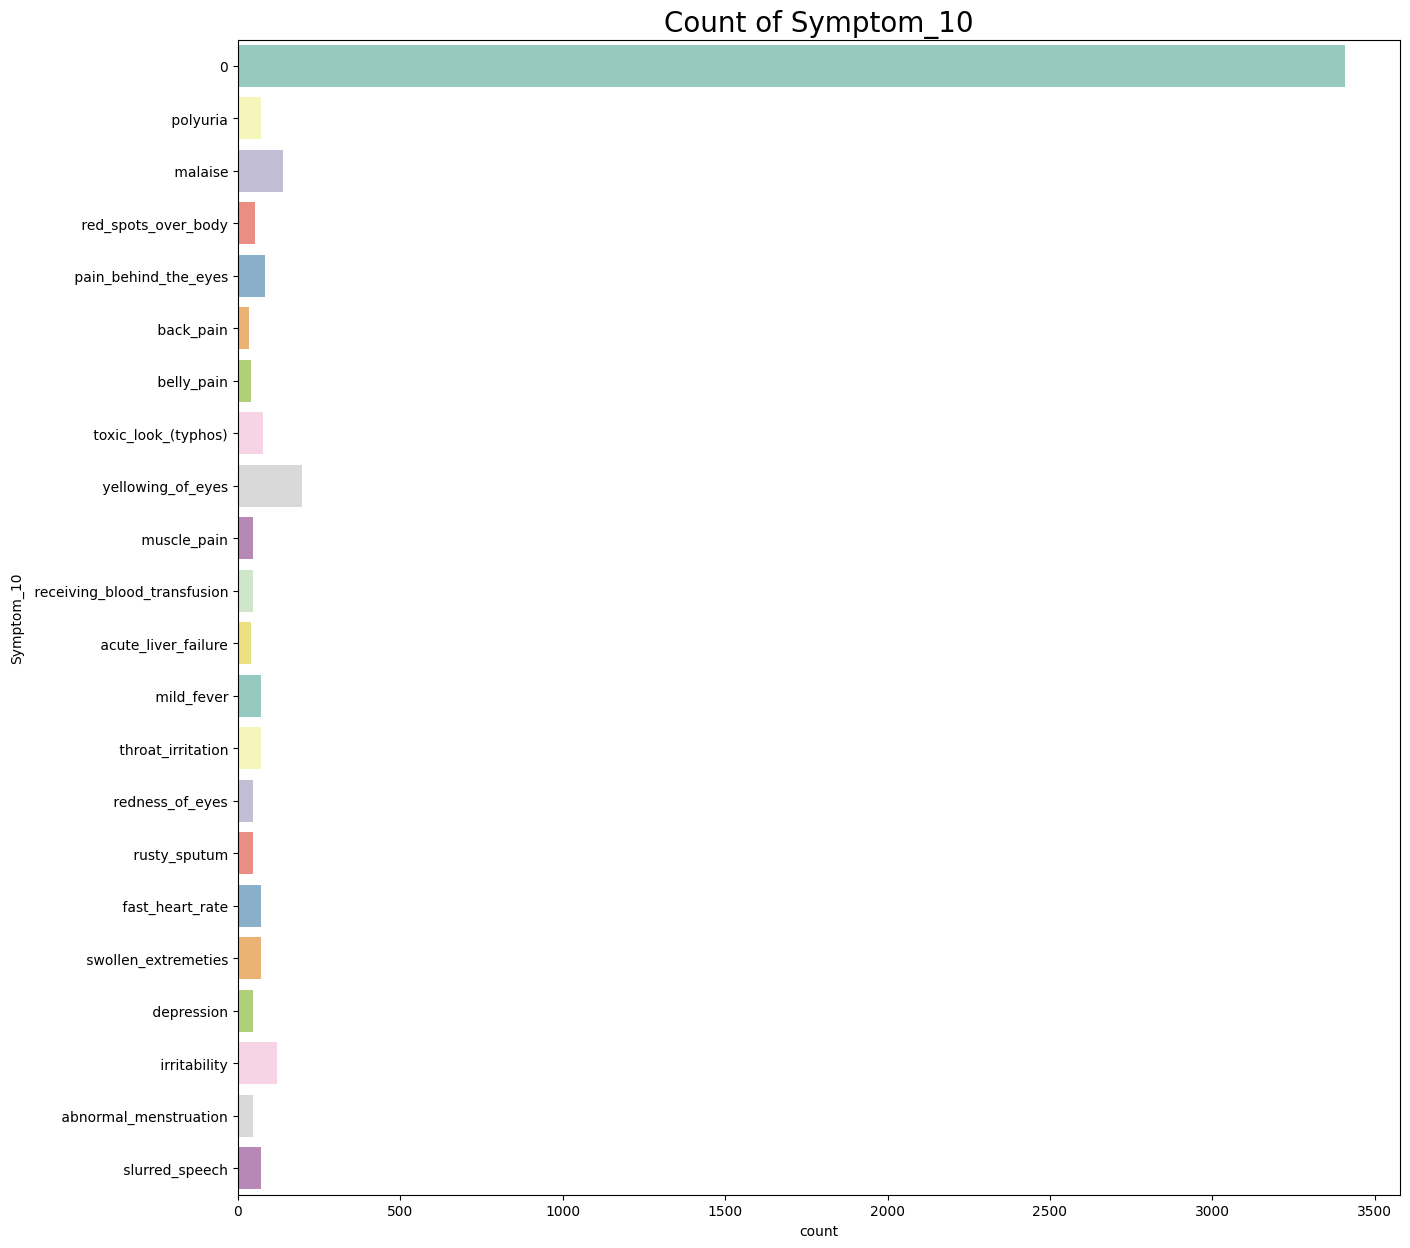

In [88]:
plt.figure(figsize=(15,15))
sns.countplot(y="Symptom_10", data=df, palette="Set3")
plt.title("Count of Symptom_10", fontsize=20)
plt.show()

In [89]:
df["Symptom_11"].value_counts()

Symptom_11
0                                  3726
 irritability                       120
 back_pain                           84
 yellowing_of_eyes                   72
 abnormal_menstruation               72
 depression                          72
 rusty_sputum                        72
 redness_of_eyes                     72
 acute_liver_failure                 72
 receiving_blood_transfusion         72
 muscle_pain                         72
 belly_pain                          72
 red_spots_over_body                 66
 coma                                48
 swelled_lymph_nodes                 48
 receiving_unsterile_injections      48
 sinus_pressure                      48
 palpitations                        48
 malaise                             36
Name: count, dtype: int64

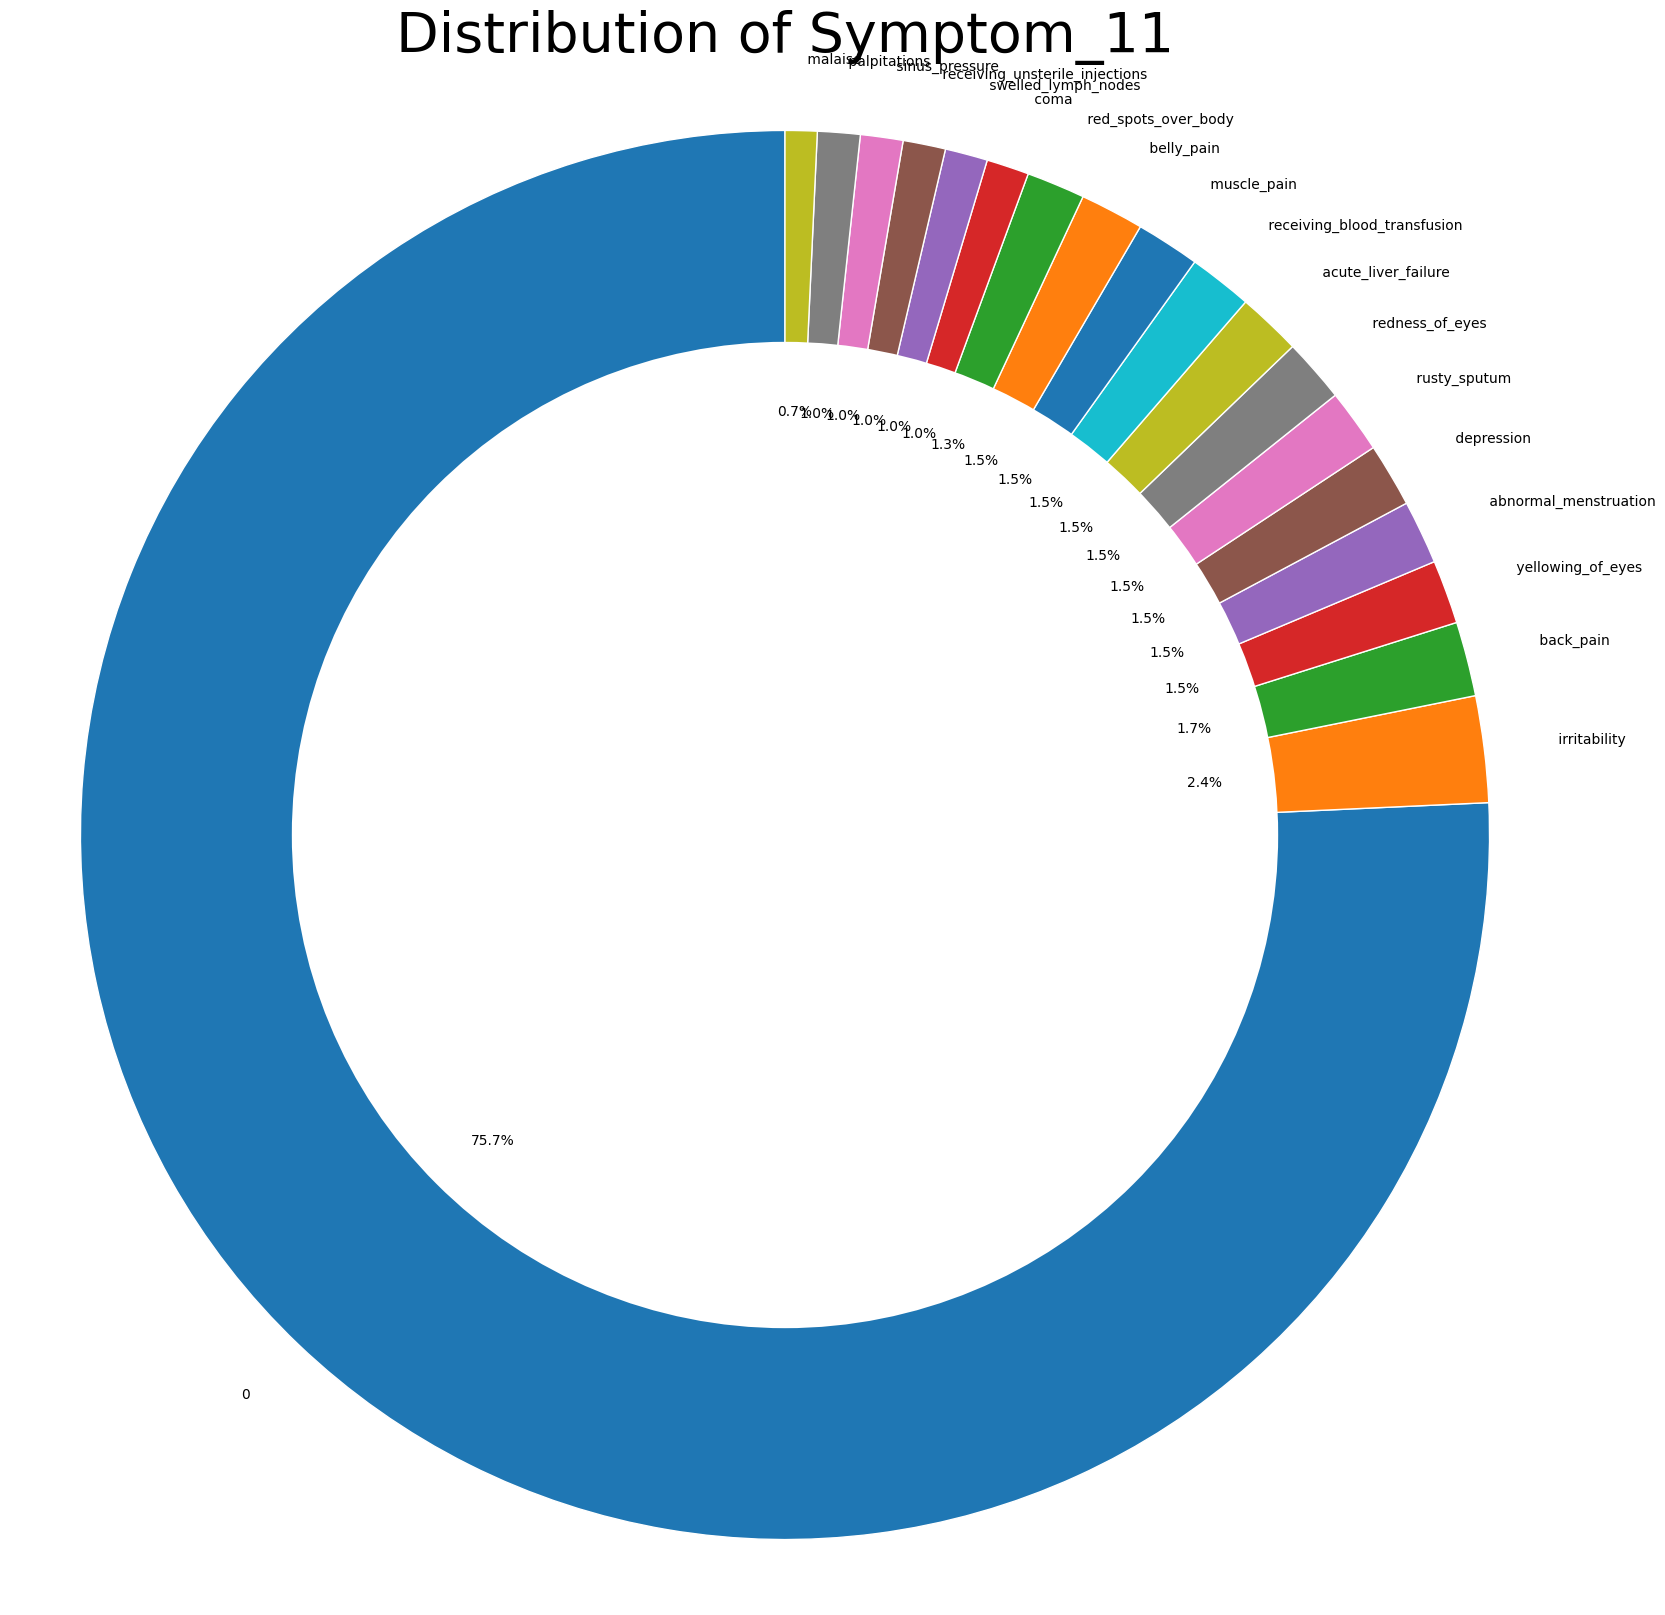

In [90]:

value_counts = df["Symptom_11"].value_counts()

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_11',fontsize=40)
plt.show()

In [91]:
df["Symptom_12"].value_counts()

Symptom_12
0                                  4176
 malaise                            126
 receiving_unsterile_injections      72
 coma                                72
 swelled_lymph_nodes                 72
 sinus_pressure                      72
 irritability                        72
 palpitations                        72
 stomach_bleeding                    48
 runny_nose                          48
 abnormal_menstruation               48
 muscle_pain                         42
Name: count, dtype: int64

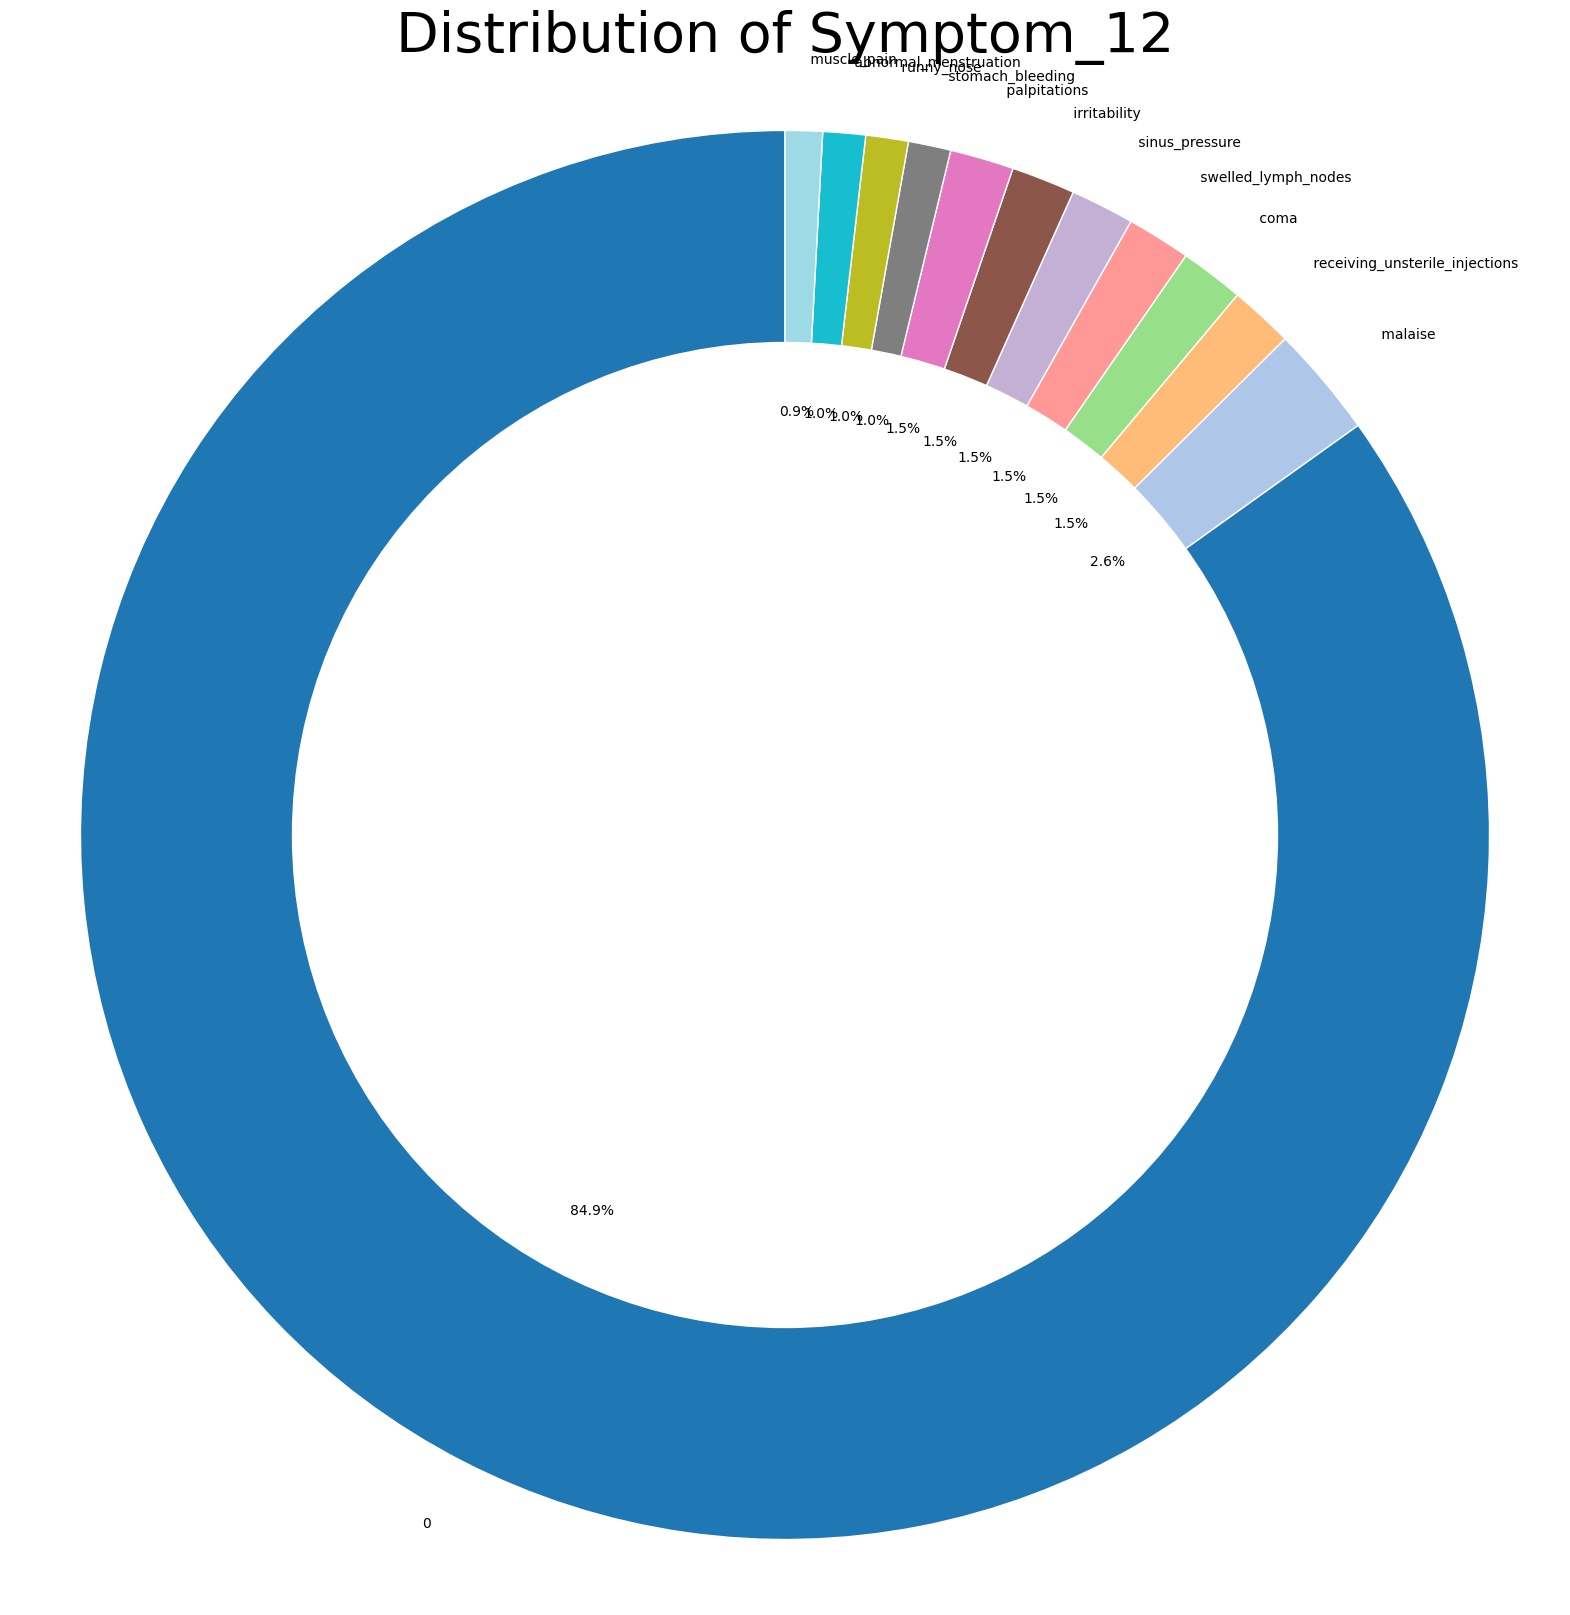

In [92]:

import numpy as np

value_counts = df["Symptom_12"].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(value_counts)))

fig, ax = plt.subplots(figsize=(20,20))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.title('Distribution of Symptom_12',fontsize=40)
plt.show()


In [93]:
df1=pd.read_csv("Symptom-severity.csv")
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [94]:
z=df1["Symptom"]

In [95]:
df1["Symptom"].value_counts()

Symptom
fluid_overload          2
itching                 1
spinning_movements      1
muscle_pain             1
irritability            1
                       ..
constipation            1
back_pain               1
pain_behind_the_eyes    1
loss_of_appetite        1
prognosis               1
Name: count, Length: 132, dtype: int64

In [96]:
# Get the percentage of each unique value in the 'weight' column
percentage = df1["weight"].value_counts(normalize=True) * 100

# Print the result
print(percentage)


weight
4    29.323308
5    26.315789
3    15.789474
6    12.781955
2    11.278195
7     3.759398
1     0.751880
Name: proportion, dtype: float64


In [97]:
df1['Symptom'].nunique()

132

In [98]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
dfx

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
y=0
dfx[z]=0
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')

In [101]:
dfx.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
dfx.shape

(4920, 263)

In [103]:
dfx.isnull().sum()

Disease                  0
itching                  0
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Length: 263, dtype: int64

In [104]:
dfx.columns


Index(['Disease', 'itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=263)

In [105]:
dfx.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
label=df["Disease"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label=le.fit_transform(label)
label

array([15, 15, 15, ..., 38, 35, 27])

In [107]:
data=dfx.drop(columns="Disease",axis=1)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, train_size=0.6, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(data,label, test_size=0.2, random_state=42)

In [109]:
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_train shape: (3936, 262), X_test shape: (1968, 262)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
y_train shape: (3936,), y_test shape: (1968,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_val shape: (984, 262), y_val shape: (984,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


In [110]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [111]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'CatBoost': CatBoostClassifier(silent=True),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier()
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    # Train and cross-validate
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: {cv_scores.mean():.3f}')
    
    # Train on the whole training set
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    print(f'{name} test F1 Score: {test_f1:.4f}, AUC-ROC Score: {test_roc:.4f}')
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    print(f'{name} validation F1 Score: {val_f1:.4f}, AUC-ROC Score: {val_roc:.4f}')
    
    # Save the model
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(clf, f)



# Iterate over classifiers and train/evaluate each one
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)

Training and evaluating Random Forest...
Random Forest cross-validation mean F1 score: 1.000
Random Forest test F1 Score: 1.0000, AUC-ROC Score: 1.0000
Random Forest validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating XGBoost...
XGBoost cross-validation mean F1 score: 0.999
XGBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
XGBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating LightGBM...
LightGBM cross-validation mean F1 score: 1.000
LightGBM test F1 Score: 1.0000, AUC-ROC Score: 1.0000
LightGBM validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating CatBoost...
CatBoost cross-validation mean F1 score: 1.000
CatBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
CatBoost validation F1 Score: 1.0000, AUC-ROC Score: 1.0000
Training and evaluating GradientBoost...
GradientBoost cross-validation mean F1 score: 1.000
GradientBoost test F1 Score: 1.0000, AUC-ROC Score: 1.0000
GradientBoost validation F1 Score: 1.0000, A

In [113]:
sd=pd.read_csv("symptom_Description.csv")

In [114]:
sd.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [116]:
sp=pd.read_csv("symptom_precaution.csv")

In [117]:
sp.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [118]:
def pred_result(m, X, sd, sp):
    # Predict probabilities for each class
    proba = m.predict_proba(X)
    
    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]
    
    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]
        
        print("Disease Name:", disease)
        print("Probability:", probability)
        
        if disease in sd["Disease"].unique():
            disp = sd[sd['Disease'] == disease].iloc[0, 1]
            print("Disease Description:", disp)
        
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precuation_list = sp.iloc[c, 1:].dropna().tolist()
            print("Recommended Things to do at home:")
            for precaution in precuation_list:
                print(precaution)
        
        print("\n")


In [119]:
x=dfx.columns[1:]
x

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       ' bladder_discomfort', ' foul_smell_of urine',
       ' continuous_feel_of_urine', ' skin_peeling', ' silver_like_dusting',
       ' small_dents_in_nails', ' inflammatory_nails', ' blister',
       ' red_sore_around_nose', ' yellow_crust_ooze'],
      dtype='object', length=262)

In [120]:
print(x.tolist())


['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowe

In [121]:
len(x)

262

In [122]:
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [129]:
def main():
    t = pd.Series([0] * len(x), index=x)  # Adjust the length to match `x`
    with open("ExtraTrees.pkl", 'rb') as f:
        m = pickle.load(f)
    
    # Modify t for specific symptoms
    symptoms_to_include = ["chest_pain", "phlegm", "runny_nose", "high_fever", "throat_irritation", "congestion", "redness_of_eyes"]
    t.loc[symptoms_to_include] = 1
    
    # Convert t to numpy array and reshape
    t_array = t.to_numpy().reshape(1, -1)
    
    # Call pred_result function
    pred_result(m, t_array, sd, sp)

if __name__ == "__main__":
    main()

Disease Name: AIDS
Probability: 0.14
Disease Description: Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease.
Recommended Things to do at home:
avoid open cuts
wear ppe if possible
consult doctor
follow up


Disease Name: Gastroenteritis
Probability: 0.14
Disease Description: Gastroenteritis is an inflammation of the digestive tract, particularly the stomach, and large and small intestines. Viral and bacterial gastroenteritis are intestinal infections associated with symptoms of diarrhea , abdominal cramps, nausea , and vomiting .
Recommended Things to do at home:
stop eating solid food for while
try taking small sips of water
rest
ease back into eating


Disease Name: Allergy
Probability: 0.1
Disease Description: An allergy is an immune system response to a foreign substance that's not typic

Explaining Random Forest using SHAP...


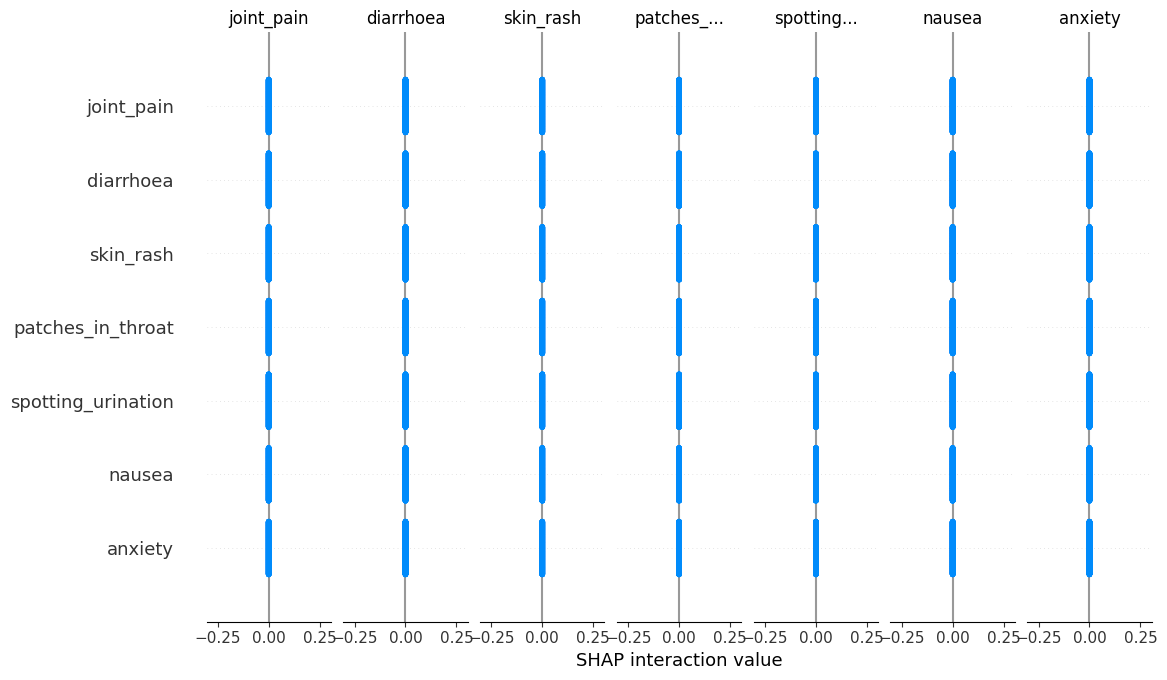

In [135]:
# Example: Use Random Forest model
model_name = 'Random Forest'
trained_model = classifiers[model_name]  # Access the trained model

# Check if the model has been trained
if hasattr(trained_model, 'predict_proba'):
    print(f"Explaining {model_name} using SHAP...")

    # Create a SHAP explainer
    explainer = shap.TreeExplainer(trained_model)

    # Compute SHAP values for the validation data
    shap_values = explainer.shap_values(X_val)

    # Visualize SHAP summary plot
    shap.summary_plot(shap_values, X_val, feature_names=X_val.columns)
else:
    print(f"Model {model_name} is not trained or doesn't support SHAP.")
